### Reading & understanding the data

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [267]:
## Import application file
application = pd.read_csv('applications_base.csv')

In [268]:
pd.set_option('display.max_rows', 150)

In [269]:
print('Rows & Columns :', application.shape)

Rows & Columns : (307511, 122)


In [270]:
## Checking for missing values
round(application.isnull().sum()/len(application)*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [271]:
columns_missing_values = application.isnull().sum()

In [272]:
columns_missing_values = list(columns_missing_values[columns_missing_values.values>= 0.4 * len(application)].index)
print(columns_missing_values)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [273]:
## drop variables with missing values greather than 40%
application.drop(labels= columns_missing_values, axis= 1, inplace= True)

In [274]:
application.shape

(307511, 73)

In [275]:
## drop unwanted variables
application.drop(application.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns, axis=1, inplace= True)
application.drop(application.loc[:, 'FLAG_MOBIL':'FLAG_EMAIL'].columns, axis= 1, inplace= True)
application.drop(application.loc[:, 'EXT_SOURCE_2':'DAYS_LAST_PHONE_CHANGE'].columns, axis= 1, inplace= True)

In [276]:
application.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

<AxesSubplot:>

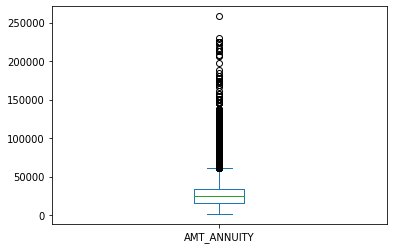

In [277]:
## Replace missing values with median for AMT_ANNUITY
application.AMT_ANNUITY.plot.box()

In [278]:
annuity_median= application.AMT_ANNUITY.median()
print(annuity_median)

24903.0


In [279]:
application.AMT_ANNUITY.fillna(annuity_median, inplace= True)

<AxesSubplot:>

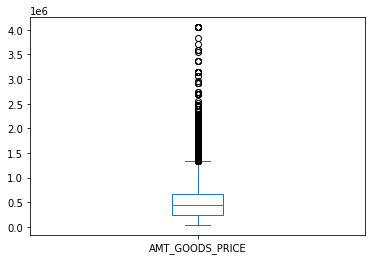

In [280]:
application.AMT_GOODS_PRICE.plot.box()

In [281]:
application.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [282]:
## Goods price is blank for all revolving loans. So imputing with 0 as these are rollig over credit not for new purchase
application.AMT_GOODS_PRICE.fillna(0, inplace=True)

In [283]:
application.NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [284]:
##Replacing missing values with mode (unaccompained)
application.NAME_TYPE_SUITE.fillna('Unaccompanied', inplace= True)

In [285]:
application.OCCUPATION_TYPE.value_counts(dropna=False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [286]:
application.loc[application['OCCUPATION_TYPE'].isnull(), 'NAME_INCOME_TYPE' ].value_counts()

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

In [287]:
application.loc[application['OCCUPATION_TYPE'].isnull(), 'ORGANIZATION_TYPE' ].value_counts()

XNA                       55372
Business Entity Type 3    14337
Other                      5192
Self-employed              3545
Business Entity Type 2     2265
Government                 2083
School                     1443
Business Entity Type 1     1310
Medicine                   1073
Transport: type 4           935
Construction                652
Military                    550
Industry: type 9            525
Industry: type 11           523
Kindergarten                498
Security Ministries         484
Industry: type 3            438
Trade: type 7               433
Housing                     417
Agriculture                 370
University                  306
Transport: type 2           283
Police                      257
Hotel                       247
Trade: type 3               238
Security                    234
Bank                        233
Industry: type 7            215
Industry: type 4            177
Restaurant                  164
Industry: type 1            153
Services

In [288]:
##Replacing missing values with new value 'Others'
application.OCCUPATION_TYPE.fillna('Others', inplace= True)

In [289]:
for i in application.columns:
    if i.startswith('AMT_REQ_CREDIT_BUREAU'):
        print(application[i].value_counts(dropna=False))

0.0    264366
NaN     41519
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
0.0    264503
NaN     41519
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
0.0    257456
NaN     41519
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
0.0     222233
NaN      41519
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
0.0      215417
NaN       41519
1.0       33862
2.0       14412
3.0        

In [290]:
## filling number of enquires columns with mode (0) assuming blank data indicates no enquiries and mode also 0. 

for i in application.columns:
    if i.startswith('AMT_REQ_CREDIT_BUREAU'):
        application.fillna(value= application[i].mode()[0],inplace= True)

In [291]:
## Check for missing values again
application[application.isna().any(axis=1)]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

In [292]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [293]:
for i in application.columns:
    if application[i].dtypes == 'object':
        print(application[i].value_counts(), end='\n\n')

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAM

In [294]:
##  These columns having incorrect/ unknown values:CODE_GENDER, NAME_TYPE_SUITE, NAME_FAMILY_STATUS, ORGANIZATION_TYPE. 
## Replacing with required values

In [295]:
application.CODE_GENDER.replace('XNA', 'F', inplace= True )
application.NAME_TYPE_SUITE.replace(['Other_B', 'Other_A', 'Group of people'], 'Other', inplace= True)

In [296]:
application.NAME_TYPE_SUITE.replace(['Spouse, partner', 'Children'], 'Family', inplace= True)

In [297]:
application.loc[application['ORGANIZATION_TYPE']=='XNA', 'NAME_INCOME_TYPE' ].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [298]:
application.loc[application['ORGANIZATION_TYPE']=='XNA', 'OCCUPATION_TYPE' ].value_counts()

Others            55372
Cleaning staff        2
Name: OCCUPATION_TYPE, dtype: int64

In [299]:
application.ORGANIZATION_TYPE.replace('XNA', 'Pensioner', inplace= True)

In [300]:
application.ORGANIZATION_TYPE= application.ORGANIZATION_TYPE.replace(['Business Entity Type 3','Business Entity Type 2', 'Business Entity Type 1'],'Business Entity')
application.ORGANIZATION_TYPE= application.ORGANIZATION_TYPE.replace(['Business Entity Type 3','Business Entity Type 2', 'Business Entity Type 1'],'Business Entity')
application.ORGANIZATION_TYPE= application.ORGANIZATION_TYPE.replace(['Trade: type 1','Trade: type 2','Trade: type 3','Trade: type 4','Trade: type 5',
                                                       'Trade: type 6','Trade: type 7','Trade: type 8','Trade: type 9','Trade: type 10',
                                                       'Trade: type 11','Trade: type 12','Trade: type 13','Trade: type 14'], 'Trade')
application.ORGANIZATION_TYPE= application.ORGANIZATION_TYPE.replace(['Industry: type 1','Industry: type 2','Industry: type 3','Industry: type 4',
                                                        'Industry: type 5','Industry: type 6','Industry: type 7','Industry: type 8',
                                                        'Industry: type 9','Industry: type 10','Industry: type 11','Industry: type 12',
                                                        'Industry: type 13'],"Industry")
application.ORGANIZATION_TYPE= application.ORGANIZATION_TYPE.replace(['Transport: type 1','Transport: type 2','Transport: type 3','Transport: type 4'],
                                                       "Transport")

In [301]:
application.ORGANIZATION_TYPE.value_counts()

Business Entity        84529
Pensioner              55374
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion      

### Data Standardization

In [302]:
application.DAYS_BIRTH= application.DAYS_BIRTH.apply(lambda x: int(abs(x//365.25)))
application.rename({'DAYS_BIRTH': 'AGE'}, axis= 1, inplace= True)
application.DAYS_EMPLOYED = application.DAYS_EMPLOYED.apply(lambda x: int(abs(x//365.25)))
application.rename({'DAYS_EMPLOYED': 'EXPERIENCE'}, axis= 1, inplace= True)

In [303]:
application['AGE_GROUP']= pd.cut(application.AGE,bins=[20,25,30,35,40,45,50,55,60,100], labels =['20-25','25-30','30-35','35-40','40-45','45-50',
                                                                                            '50-55','55-60','above 60'])
application['AGE_GROUP'].value_counts(normalize=True)

35-40       0.139419
40-45       0.134590
30-35       0.128373
above 60    0.114747
45-50       0.114445
50-55       0.113807
55-60       0.107677
25-30       0.107160
20-25       0.039781
Name: AGE_GROUP, dtype: float64

### Outlier Teratment using capping

In [304]:
application.EXPERIENCE.describe()

count    307511.000000
mean        185.656819
std         381.205858
min           0.000000
25%           3.000000
50%           7.000000
75%          16.000000
max         999.000000
Name: EXPERIENCE, dtype: float64

<AxesSubplot:>

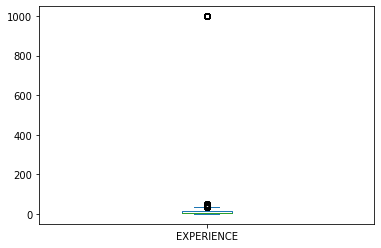

In [305]:
application.EXPERIENCE.plot.box()

In [306]:
application.EXPERIENCE.value_counts()

999    55374
2      31845
3      29627
1      27980
4      25152
5      21750
6      16259
7      15030
8      13185
9      11430
10      8967
11      7333
12      5921
13      5303
15      4621
14      4349
16      2733
17      2318
18      2017
19      1902
20      1884
21      1600
22      1453
23      1253
24      1007
25       914
26       817
28       666
27       656
29       606
30       560
31       454
32       443
35       358
33       352
34       329
36       261
37       189
38       141
40       125
39       113
41        60
42        58
43        41
45        30
44        20
46        13
47         4
48         3
0          2
49         2
50         1
Name: EXPERIENCE, dtype: int64

In [307]:
application.loc[application['EXPERIENCE']==999, 'NAME_INCOME_TYPE' ].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [308]:
application.EXPERIENCE= application.EXPERIENCE.replace(999, 50)

<AxesSubplot:>

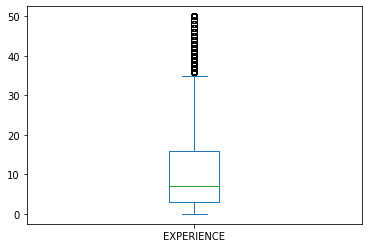

In [309]:
application.EXPERIENCE.plot.box()

In [310]:
application.EXPERIENCE.describe()

count    307511.000000
mean         14.768864
std          17.501555
min           0.000000
25%           3.000000
50%           7.000000
75%          16.000000
max          50.000000
Name: EXPERIENCE, dtype: float64

### Binning the required variables

In [311]:
application['EXPERIENCE_GROUP']= pd.cut(application.EXPERIENCE,bins=[0,5,10,20,30,40,50], 
                                        labels= ['0-5','5-10','10-20','20-30','30-40','above 40'])
application['EXPERIENCE_GROUP'].value_counts()

0-5         136354
5-10         64871
above 40     55606
10-20        38381
20-30         9532
30-40         2765
Name: EXPERIENCE_GROUP, dtype: int64

In [312]:
bins = [0,50000,100000,200000,300000,400000,500000,10000000000]
slot = ['0-50k', '50k-100k','100k-200k','200k-300k', '300k-400k', '400k-500k','above 500k']

application['AMT_INCOME_RANGE']=pd.cut(application['AMT_INCOME_TOTAL'],bins,labels=slot)

In [313]:
application['AMT_INCOME_RANGE'].value_counts()

100k-200k     155898
200k-300k      65176
50k-100k       59181
300k-400k      14676
400k-500k       5361
0-50k           4517
above 500k      2702
Name: AMT_INCOME_RANGE, dtype: int64

In [314]:
application.shape

(307511, 43)

In [315]:
application.drop(['EXPERIENCE','AGE','AMT_INCOME_TOTAL'], axis=1, inplace= True)

In [316]:
list_numerical =[]
for i in application.columns:
    if application[i].dtype == 'int64' or 'float64':
        list_numerical.append(i)

In [317]:
list_numerical.remove('SK_ID_CURR')

<AxesSubplot:>

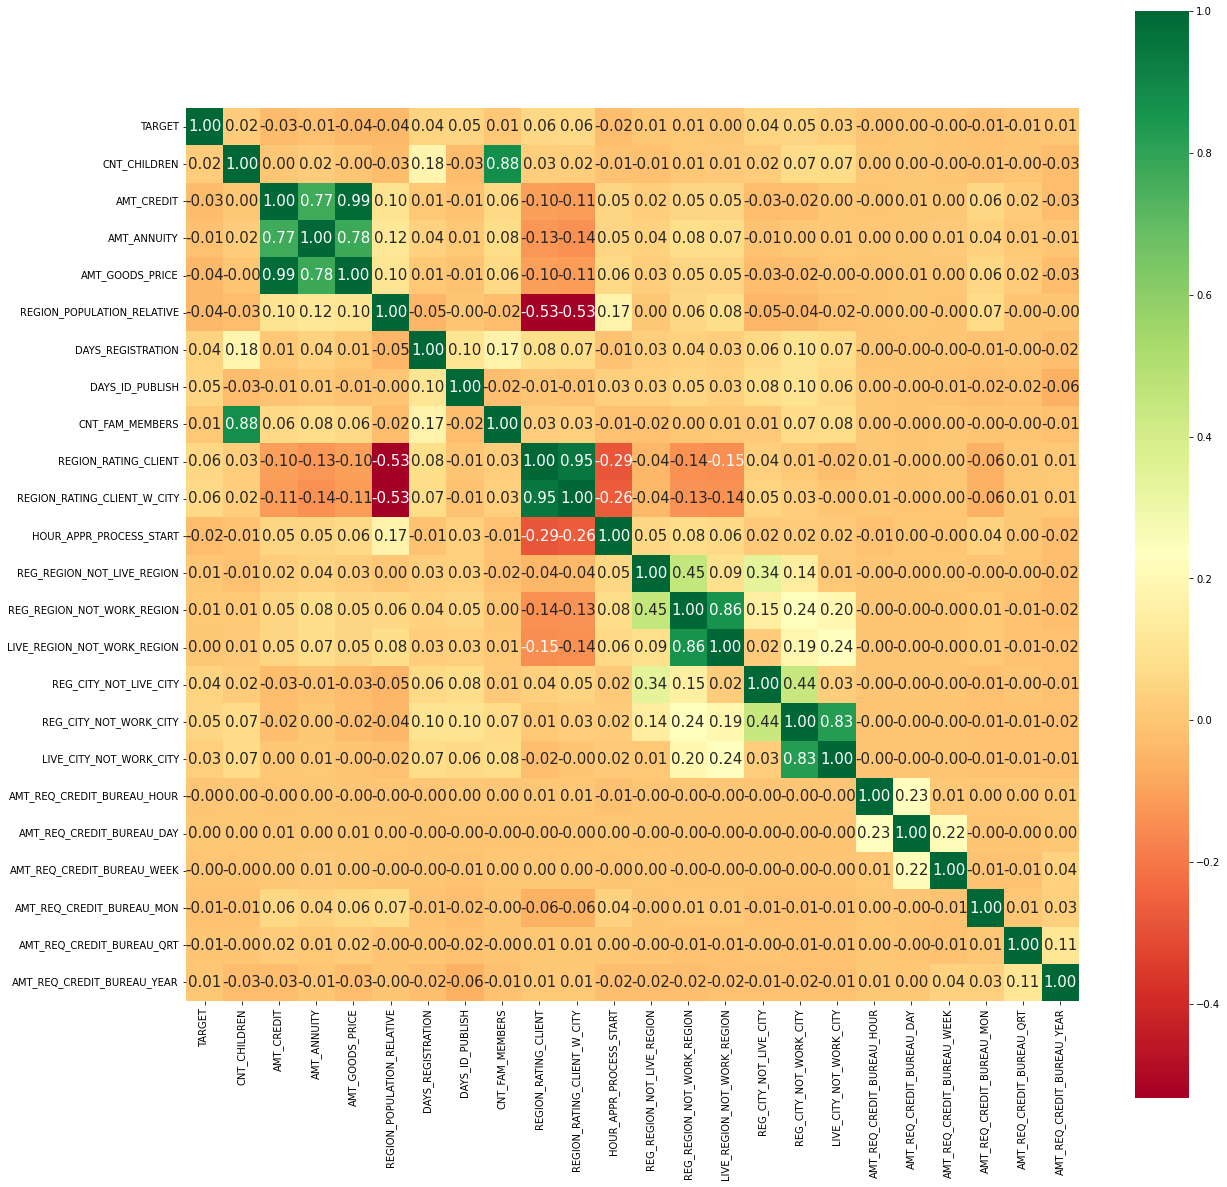

In [318]:
# check correlation of continuous vars with target

# Finding out the correlation between the features
list_numerical_corr = application[list_numerical].corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(list_numerical_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='RdYlGn')

In [319]:
## Remove highly correalted variables 
list_remove= ['CNT_FAM_MEMBERS','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_RATING_CLIENT_W_CITY','LIVE_REGION_NOT_WORK_REGION',
              'LIVE_CITY_NOT_WORK_CITY','REGION_POPULATION_RELATIVE']

In [320]:
application.drop(list_remove, axis=1, inplace= True)

### Exploratory Data Analysis

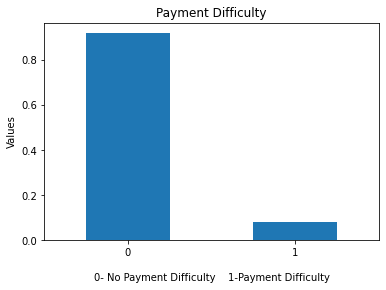

In [329]:
application.TARGET.value_counts(normalize= True).plot.bar()
plt.title('Payment Difficulty')
plt.xlabel("\n0- No Payment Difficulty    1-Payment Difficulty")
plt.ylabel("Values")
plt.xticks(rotation =0)
plt.show()

In [331]:
## checking ratio of payment difficulity (0 to 1)
application[application.TARGET==0].shape[0]/application[application.TARGET==1].shape[0]

11.387150050352467

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64


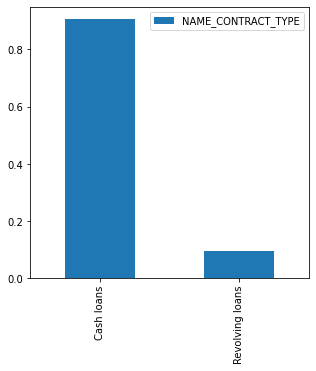

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64


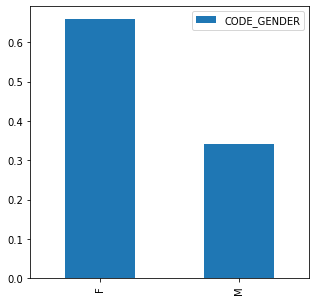

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


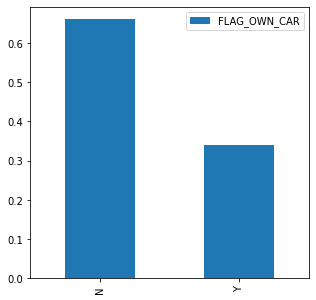

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


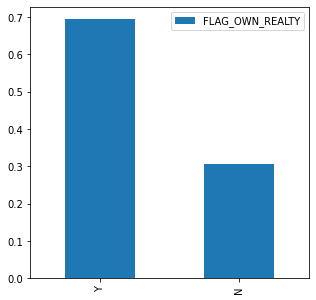

Unaccompanied    0.812387
Family           0.178159
Other            0.009453
Name: NAME_TYPE_SUITE, dtype: float64


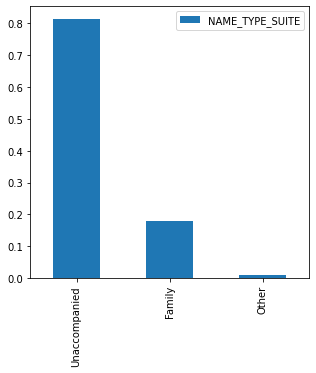

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


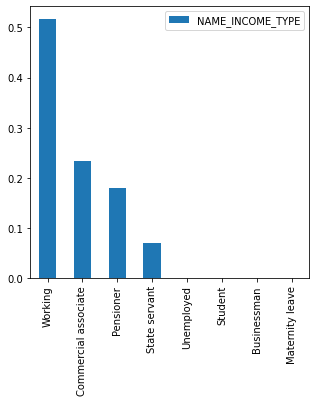

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


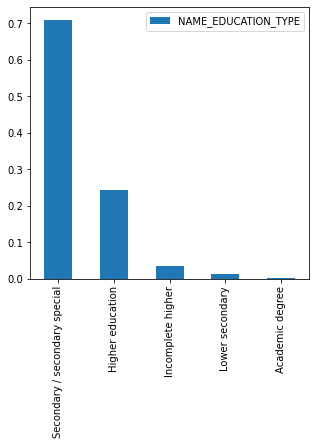

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64


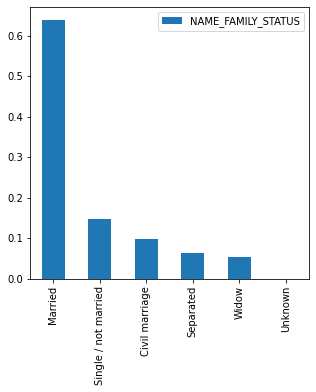

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


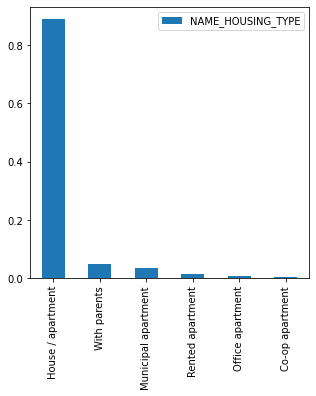

Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64


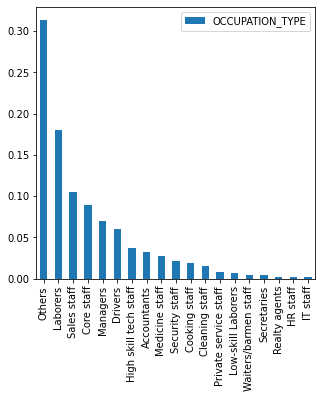

TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


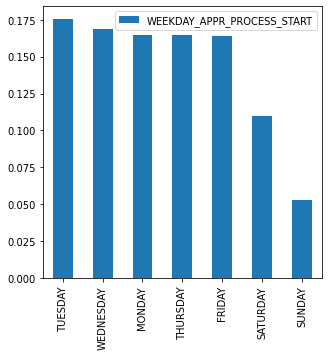

Business Entity        0.274881
Pensioner              0.180072
Self-employed          0.124913
Other                  0.054252
Trade                  0.046551
Industry               0.046538
Medicine               0.036399
Government             0.033833
Transport              0.029235
School                 0.028919
Kindergarten           0.022373
Construction           0.021856
Security               0.010559
Housing                0.009619
Military               0.008566
Bank                   0.008153
Agriculture            0.007980
Police                 0.007613
Postal                 0.007014
Security Ministries    0.006419
Restaurant             0.005889
Services               0.005122
University             0.004315
Hotel                  0.003141
Electricity            0.003089
Insurance              0.001941
Telecom                0.001876
Emergency              0.001821
Advertising            0.001395
Realtor                0.001288
Culture                0.001232
Mobile  

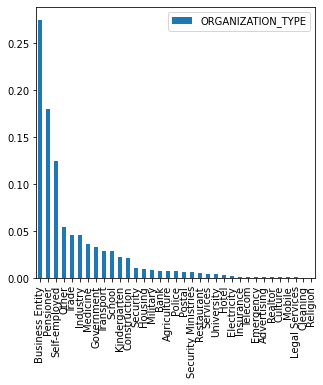

In [333]:
for cols in application.columns:
    if application[cols].dtypes=='object':
        print(application[cols].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[5,5])
        application[cols].value_counts(normalize=True, dropna=False).plot.bar()
        plt.legend()
        plt.show()

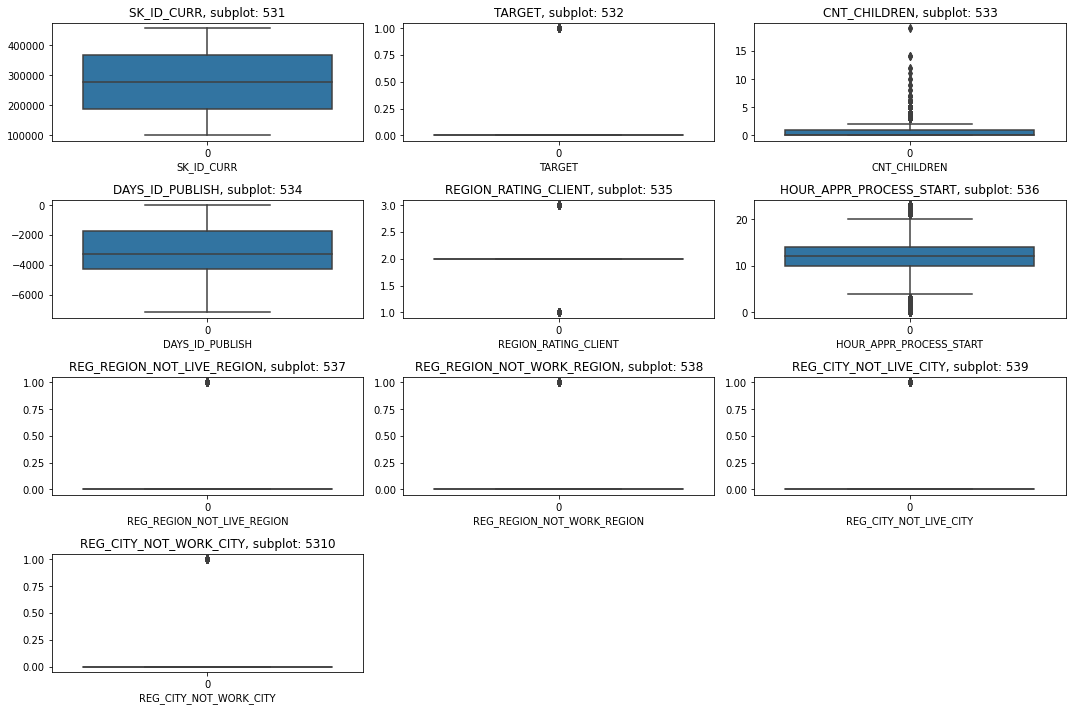

In [328]:
a = 5  
b = 3  
c = 1  

fig = plt.figure(figsize=(15,12))

for i in application.columns:
    if application[i].dtypes=="int64" or application[i].dtypes=="int32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(application[i])
        c = c + 1

fig.tight_layout()
plt.show()

In [334]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)
target0=application.loc[application["TARGET"]==0]
target1=application.loc[application["TARGET"]==1]

In [342]:
list1 =[]
for i in application.columns:
    if application[i].dtype == 'int64':
        list1.append(i)

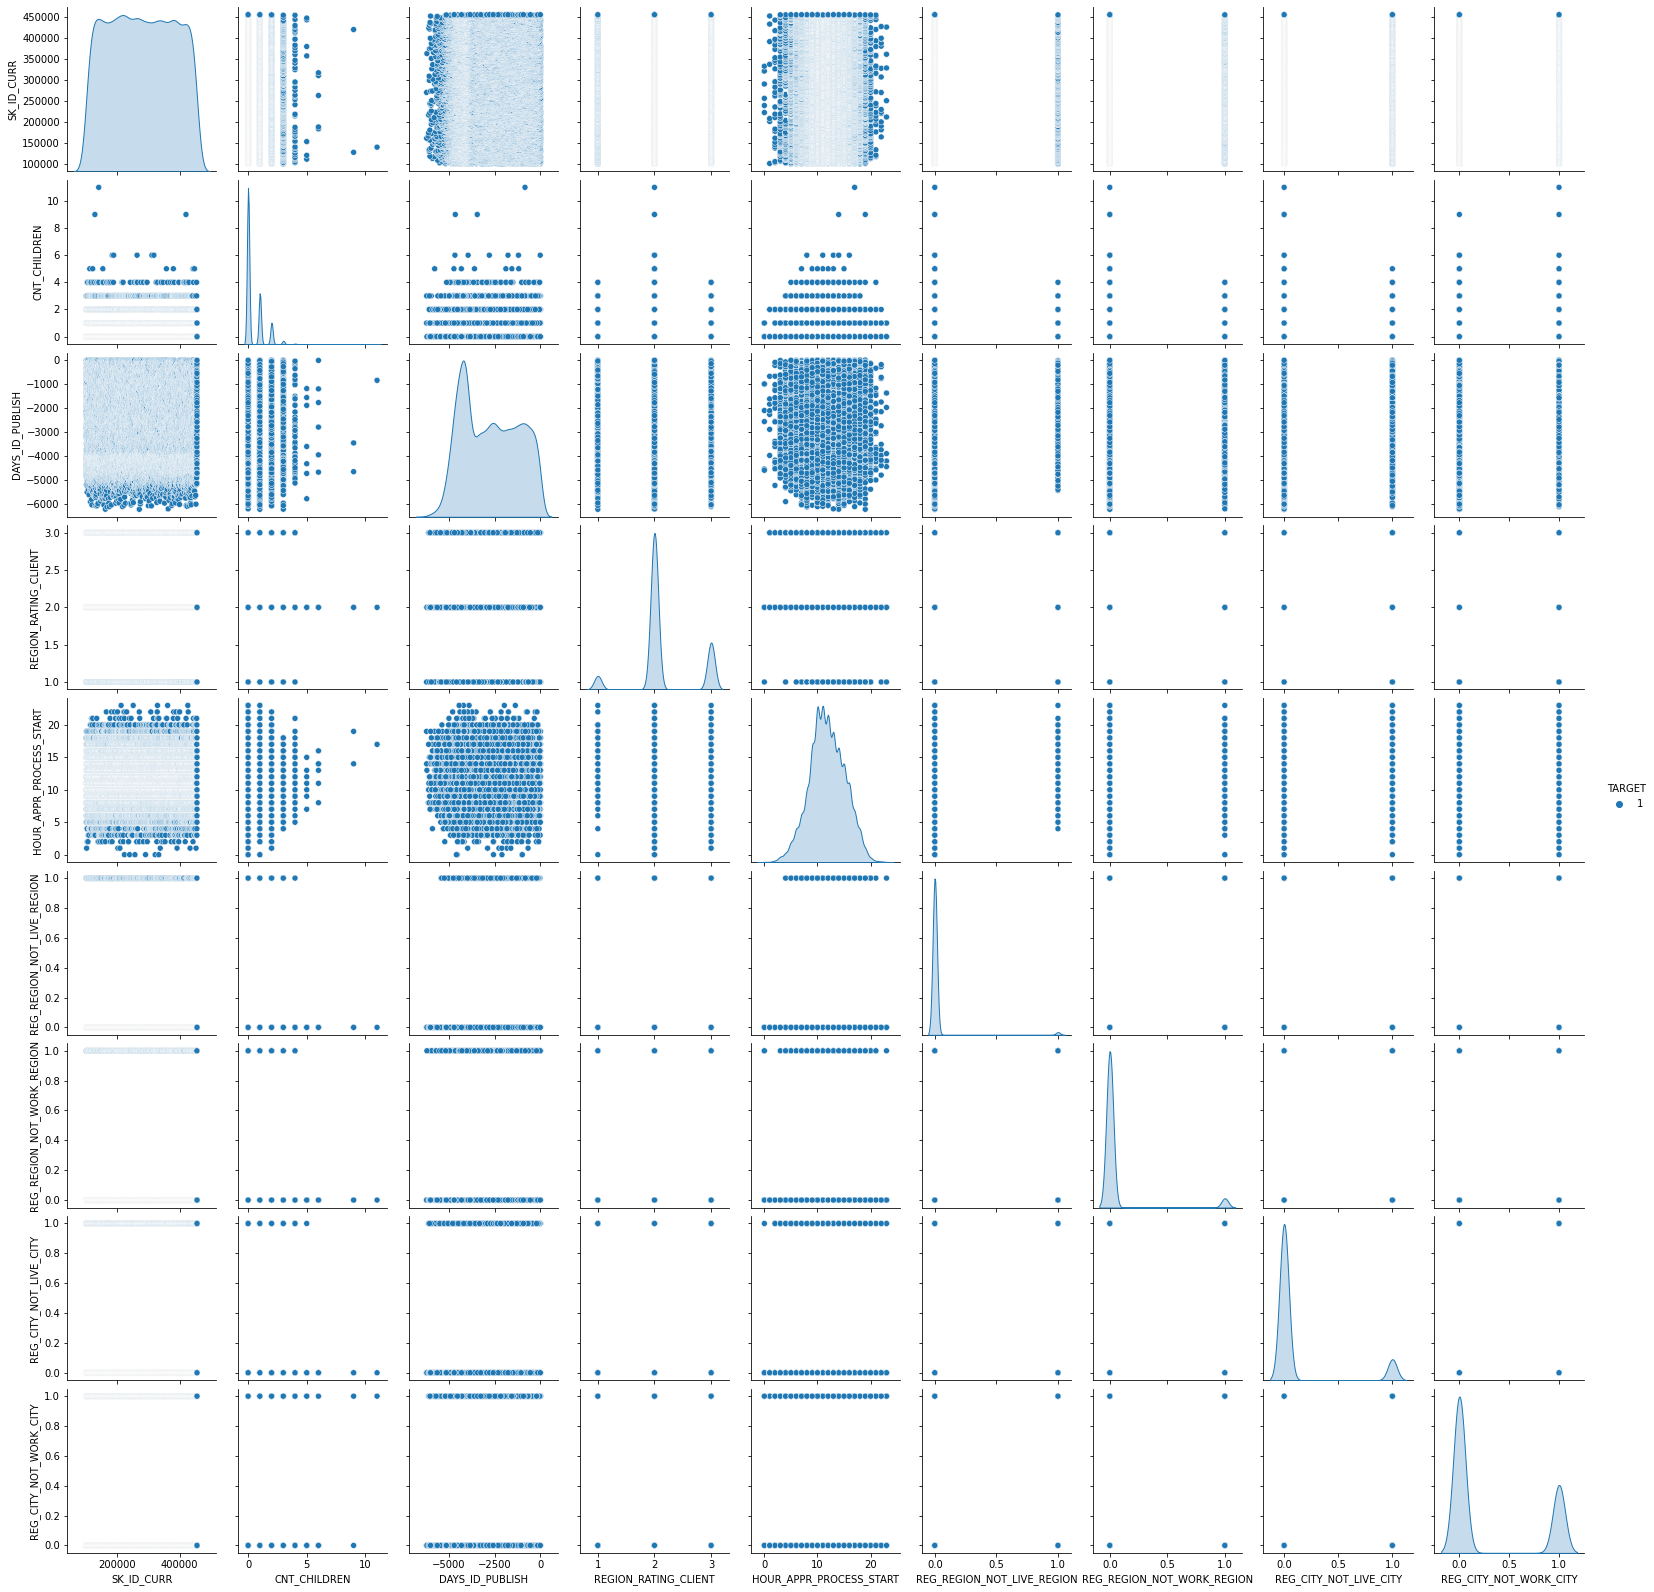

In [343]:
pair = target1[list1].fillna(0)
sns.pairplot(pair, diag_kind='kde',hue='TARGET')

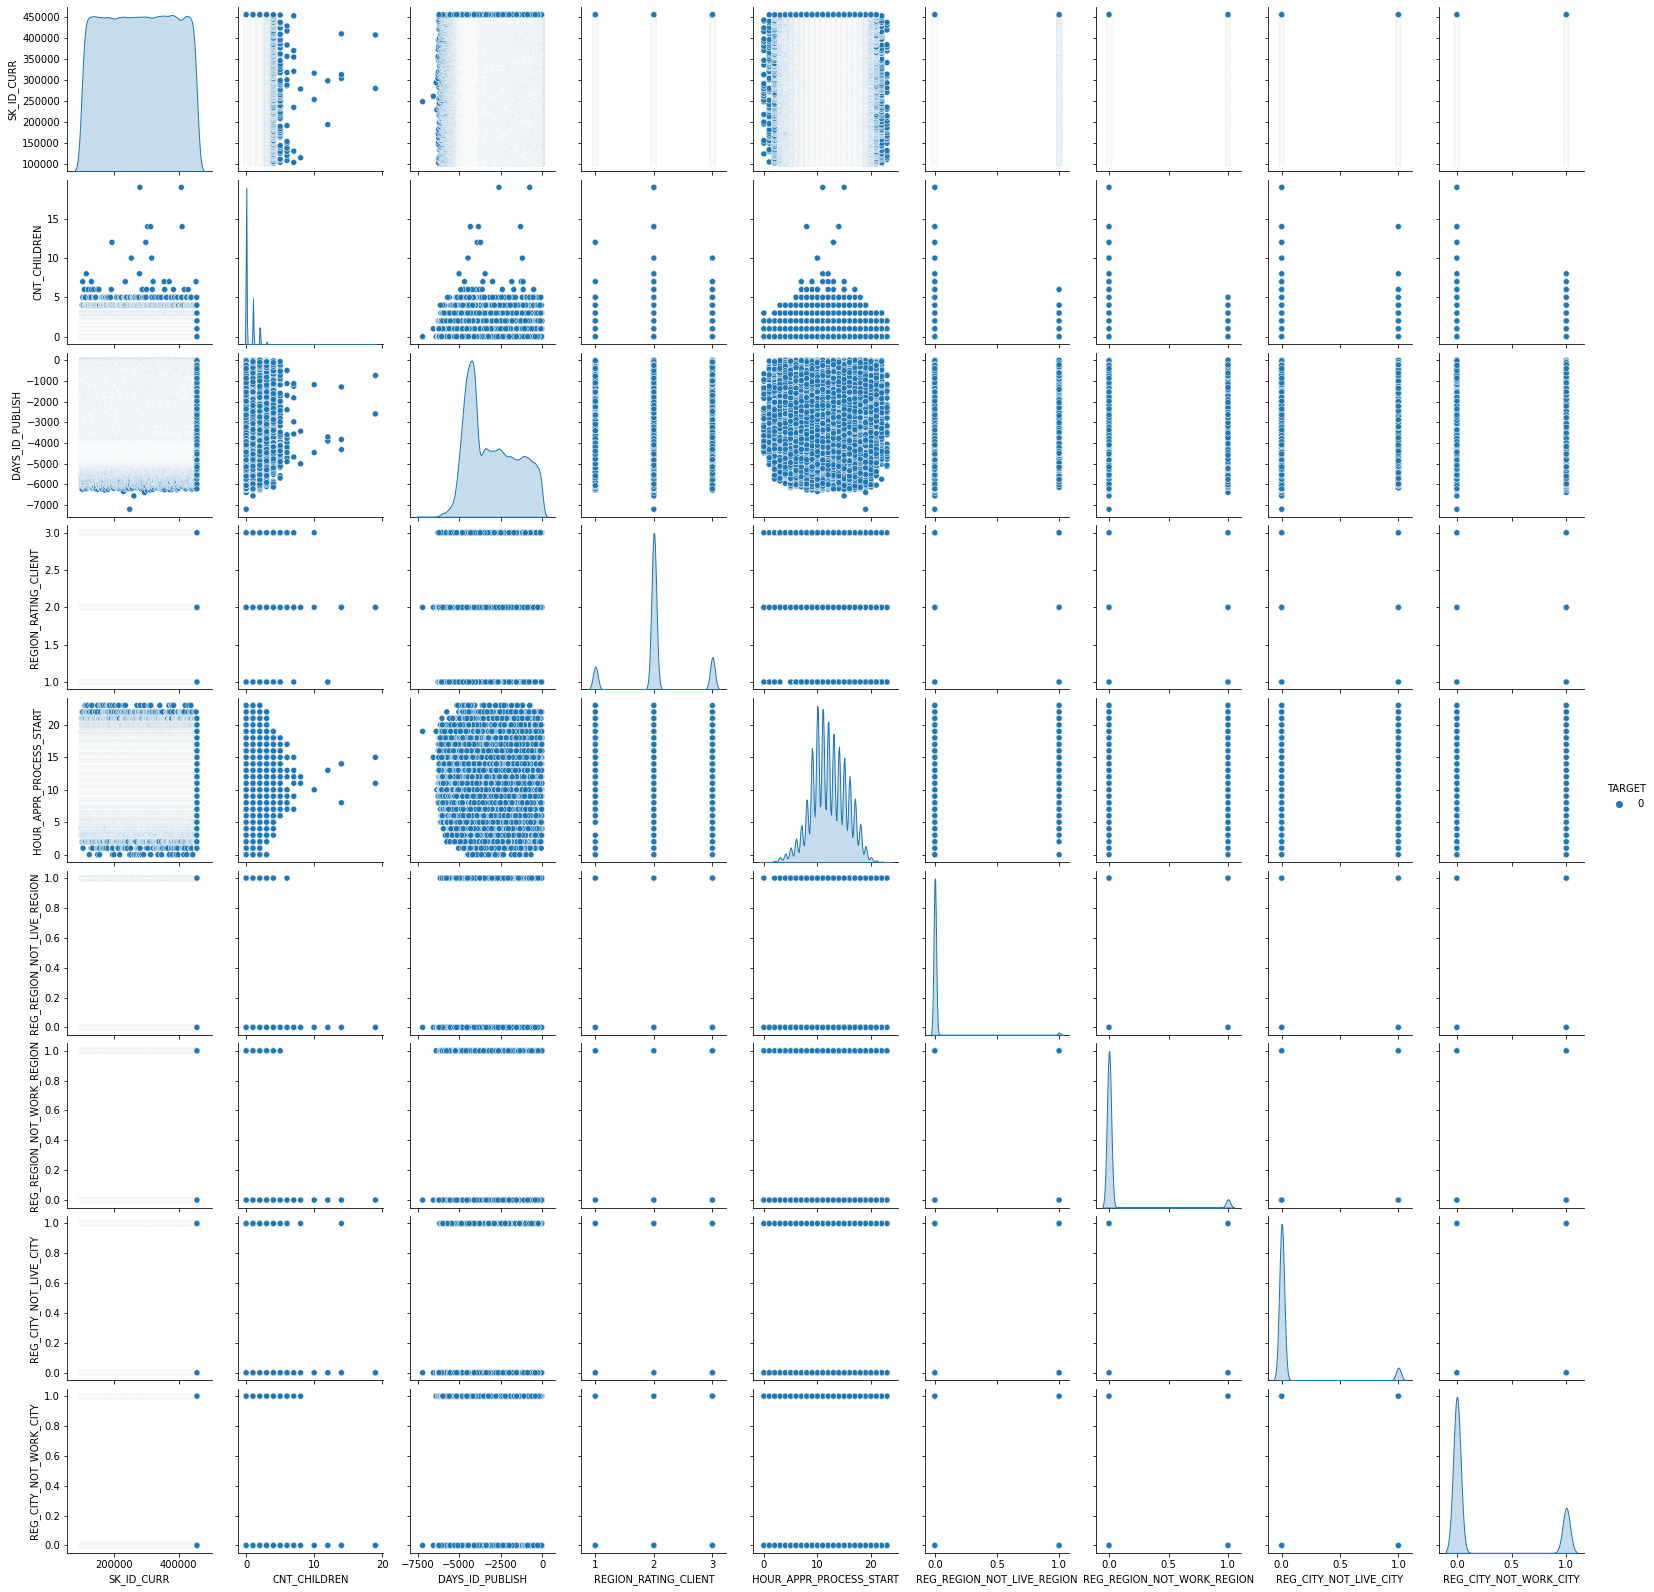

In [344]:
pair = target0[list1].fillna(0)
sns.pairplot(pair, diag_kind='kde',hue='TARGET')

In [345]:
target0_corr=target0.iloc[0:,2:]
target1_corr=target1.iloc[0:,2:]
target0_df=target0_corr.corr(method='spearman')
target1_df=target1_corr.corr(method='spearman')

<AxesSubplot:>

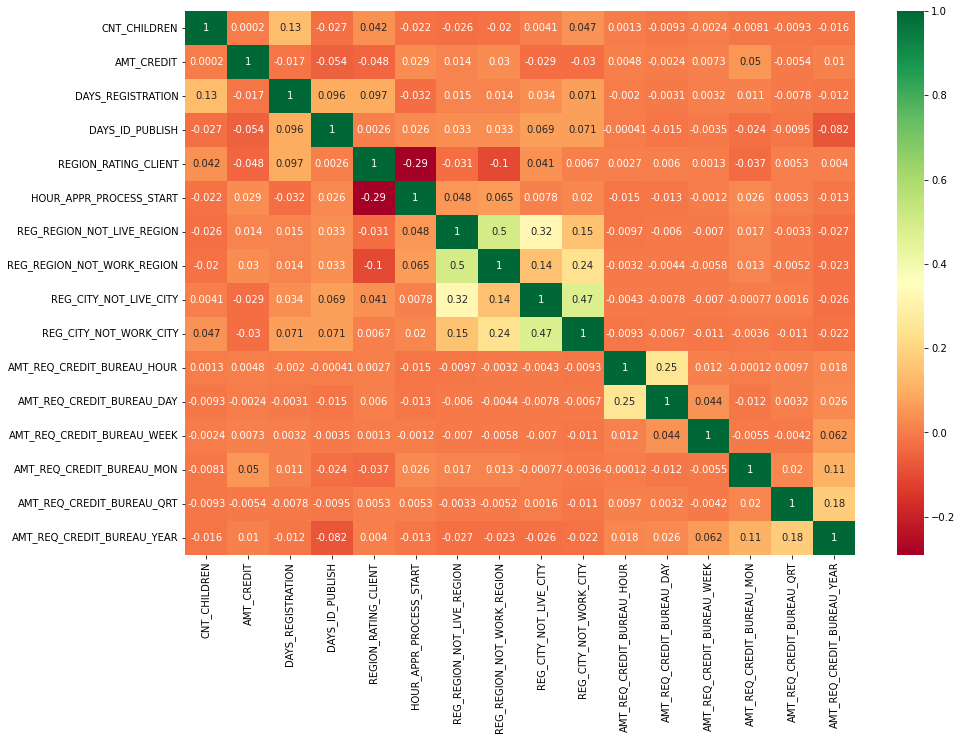

In [362]:
plt.figure(figsize=(15, 10))
sns.heatmap(data= target1_df, cmap='RdYlGn', annot= True)

<AxesSubplot:>

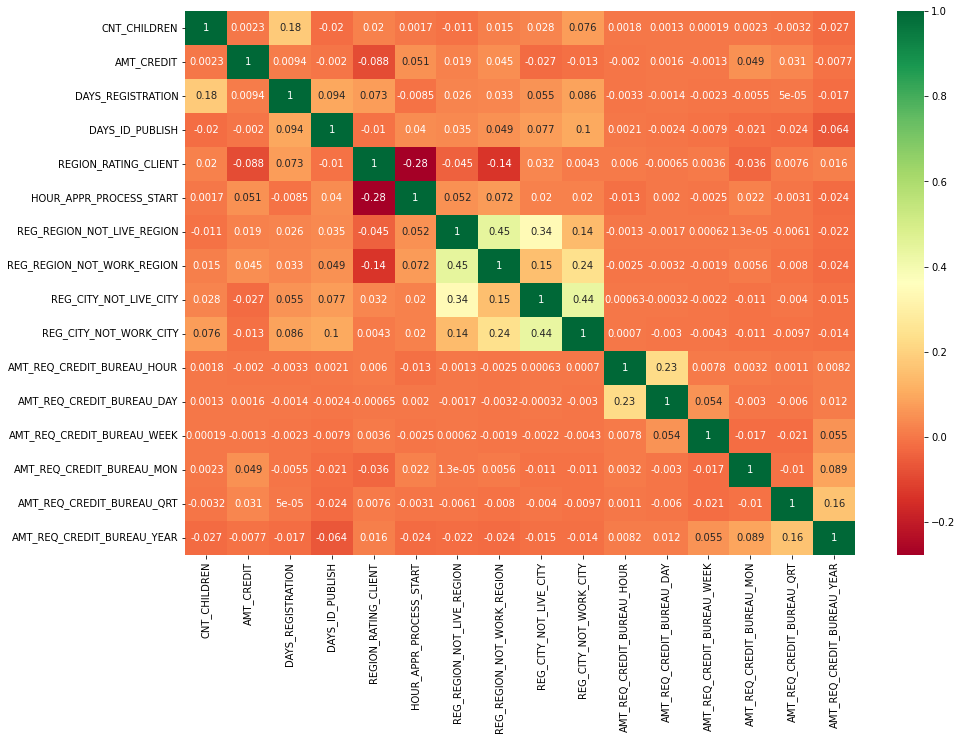

In [363]:
plt.figure(figsize=(15, 10))
sns.heatmap(data= target0_df, cmap='RdYlGn', annot= True)

35-40       0.139419
40-45       0.134590
30-35       0.128373
above 60    0.114747
45-50       0.114445
50-55       0.113807
55-60       0.107677
25-30       0.107160
20-25       0.039781
Name: AGE_GROUP, dtype: float64


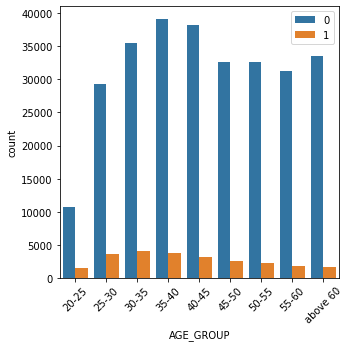

0-5         0.443412
5-10        0.210955
above 40    0.180826
10-20       0.124812
20-30       0.030997
30-40       0.008992
NaN         0.000007
Name: EXPERIENCE_GROUP, dtype: float64


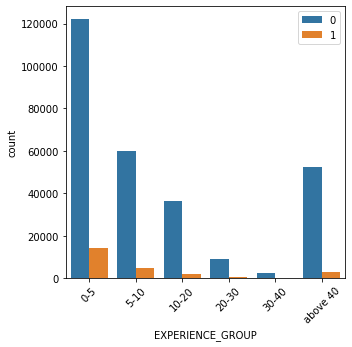

100k-200k     0.506967
200k-300k     0.211947
50k-100k      0.192452
300k-400k     0.047725
400k-500k     0.017434
0-50k         0.014689
above 500k    0.008787
Name: AMT_INCOME_RANGE, dtype: float64


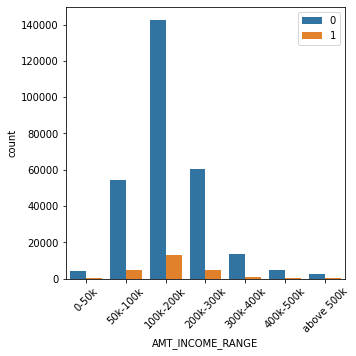

In [381]:
for cols in application.columns:
    if application[cols].dtypes=='category':
        print(application[cols].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[5,5])
        sns.countplot( data= application, x= application[cols], hue='TARGET')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

### Data Preparation

### One hot encoding for categorical variables

In [58]:
list_ohe =[]
for i in application.columns:
    if application[i].dtype == 'object':
        list_ohe.append(i)

In [59]:
list_ohe

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [60]:
print('Before ohe we have {} features'.format(application.shape[1]))
application_ohe = pd.get_dummies(application, columns=list_ohe, drop_first=True)
print('After ohe we have {} features'.format(application_ohe.shape[1]))

Before ohe we have 33 features
After ohe we have 106 features


In [61]:
application_ohe = pd.get_dummies(application_ohe, columns= ['AGE_GROUP','EXPERIENCE_GROUP','AMT_INCOME_RANGE'], drop_first= True)

In [62]:
application_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_INCOME_RANGE_above 500k
dtypes: float64(8), int64(10), uint8(104)
memory usage: 72.7 MB


In [63]:
list_numerical =[]
for i in application_ohe.columns:
    if application_ohe[i].dtype == 'uint8':
        list_numerical.append(i)

In [64]:
len(list_numerical)

104

In [65]:
pd.set_option('display.max_columns', 150)

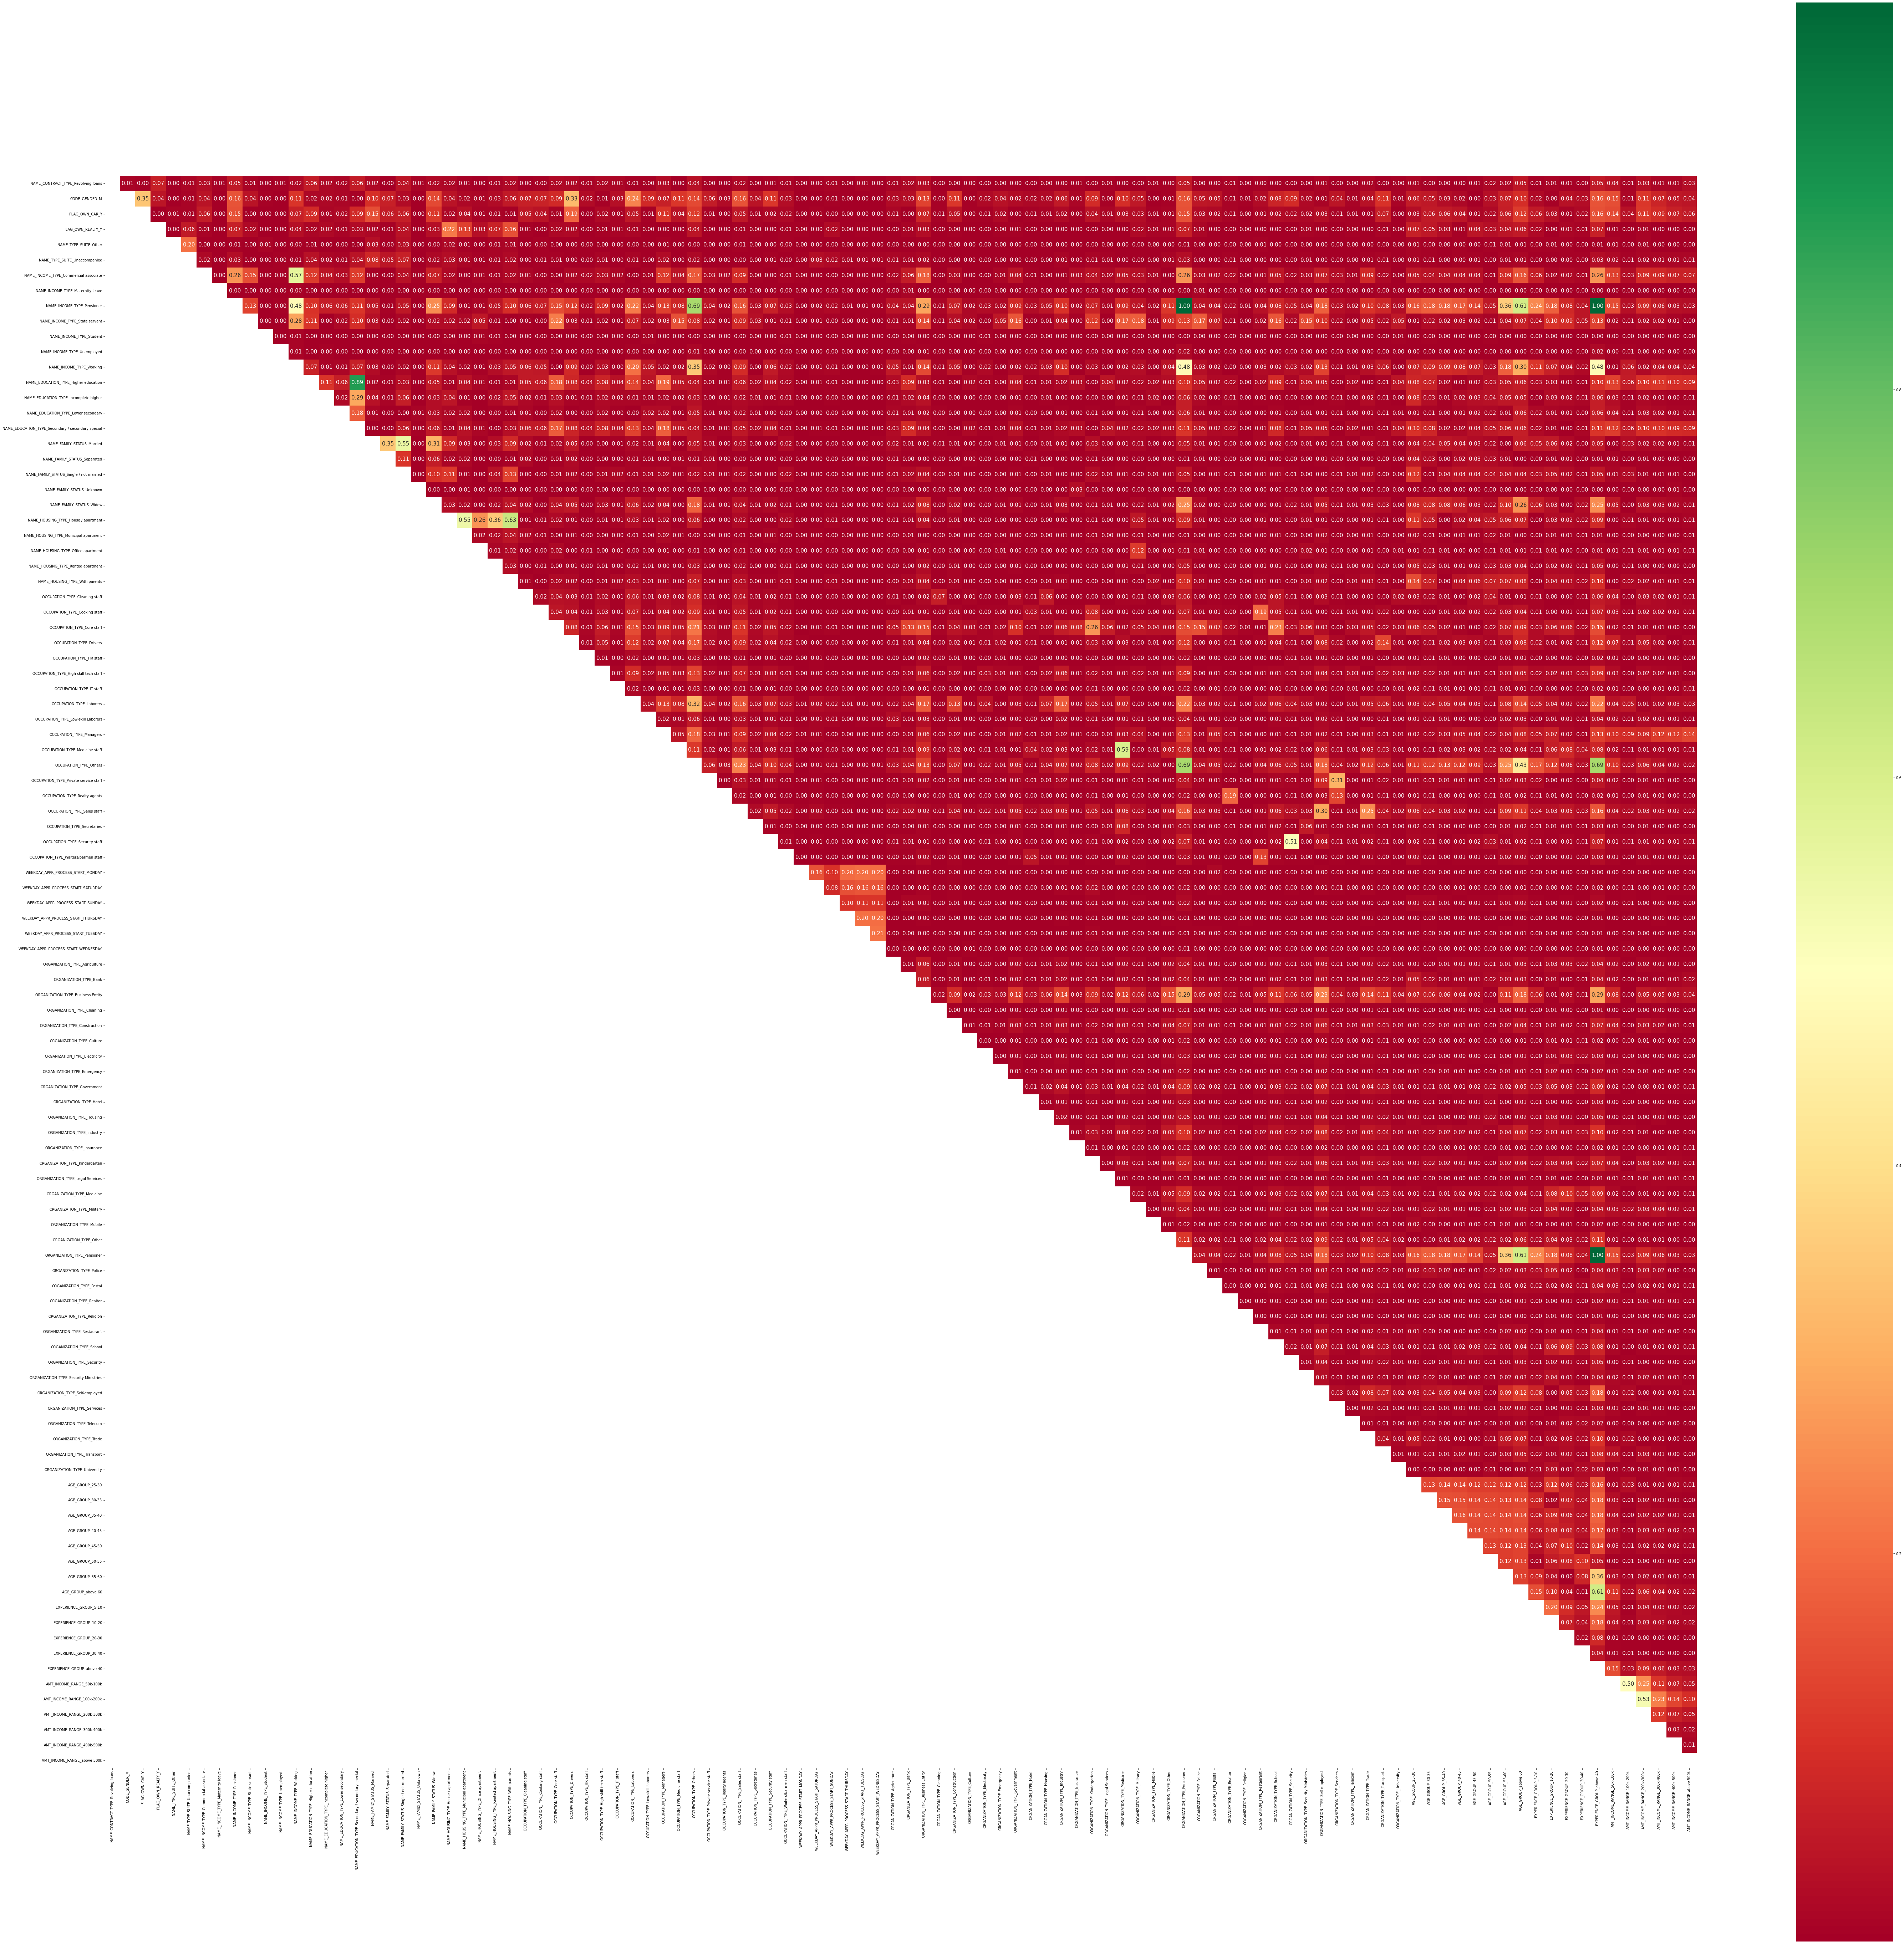

In [66]:
## Checking for highly coorelated variable after onehot encoding
# Create correlation matrix
list_numerical_corr = application_ohe[list_numerical].corr().abs()

# Select upper triangle of correlation matrix
upper = list_numerical_corr.where(np.triu(np.ones(list_numerical_corr.shape), k=1).astype(bool))

plt.figure(figsize=(100,100))
sns.heatmap(upper, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='RdYlGn')

# Find features with correlation greater than 0.7
high_corr_columns = [column for column in upper.columns if any(upper[column] > 0.7)]


In [67]:
print(high_corr_columns)

['NAME_EDUCATION_TYPE_Secondary / secondary special', 'ORGANIZATION_TYPE_Pensioner', 'EXPERIENCE_GROUP_above 40']


In [68]:
list_numerical_corr[high_corr_columns]

NAME_EDUCATION_TYPE_Secondary / secondary special  \
NAME_CONTRACT_TYPE_Revolving loans                                                          0.061729   
CODE_GENDER_M                                                                               0.004719   
FLAG_OWN_CAR_Y                                                                              0.087795   
FLAG_OWN_REALTY_Y                                                                           0.025519   
NAME_TYPE_SUITE_Other                                                                       0.003517   
NAME_TYPE_SUITE_Unaccompanied                                                               0.040908   
NAME_INCOME_TYPE_Commercial associate                                                       0.121637   
NAME_INCOME_TYPE_Maternity leave                                                            0.002757   
NAME_INCOME_TYPE_Pensioner                                                                  0.107898   
NAME_INCOME_TYPE_State servant                                                              0.097066   
NAME_INCOME_TYPE_Student                                                                    0.001671   
NAME_INCOME_TYPE_Unemployed                                                                 0.002224   
NAME_INCOME_TYPE_Working                                                                    0.069859   
NAME_EDUCATION_TYPE_Higher education                                                        0.888002   
NAME_EDUCATION_TYPE_Incomplete higher                                                       0.291081   
NAME_EDUCATION_TYPE_Lower secondary                                                         0.175475   
NAME_EDUCATION_TYPE_Secondary / secondary special                                           1.000000   
NAME_FAMILY_STATUS_Married                                                                  0.003150   
NAME_FAMILY_STATUS_Separated                                                                0.003345   
NAME_FAMILY_STATUS_Single / not married                                                     0.057036   
NAME_FAMILY_STATUS_Unknown                                                                  0.003992   
NAME_FAMILY_STATUS_Widow                                                                    0.056801   
NAME_HOUSING_TYPE_House / apartment                                                         0.011746   
NAME_HOUSING_TYPE_Municipal apartment                                                       0.037063   
NAME_HOUSING_TYPE_Office apartment                                                          0.014324   
NAME_HOUSING_TYPE_Rented apartment                                                          0.002606   
NAME_HOUSING_TYPE_With parents                                                              0.034156   
OCCUPATION_TYPE_Cleaning staff                                                              0.055165   
OCCUPATION_TYPE_Cooking staff                                                               0.057947   
OCCUPATION_TYPE_Core staff                                                                  0.174049   
OCCUPATION_TYPE_Drivers                                                                     0.078063   
OCCUPATION_TYPE_HR staff                                                                    0.038538   
OCCUPATION_TYPE_High skill tech staff                                                       0.075027   
OCCUPATION_TYPE_IT staff                                                                    0.041901   
OCCUPATION_TYPE_Laborers                                                                    0.132427   
OCCUPATION_TYPE_Low-skill Laborers                                                          0.035097   
OCCUPATION_TYPE_Managers                                                                    0.178439   
OCCUPATION_TYPE_Medicine staff                                                              0.05463

In [69]:
# Drop features 
application_ohe.drop(high_corr_columns, axis=1, inplace= True)

In [70]:
application_ohe.shape

(307511, 119)

In [71]:
## Import bureau dataset
bureau = pd.read_csv('bureau.csv')

In [72]:
bureau.shape

(1716428, 17)

In [73]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [74]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [75]:
ohe_cols = ['CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']

In [76]:
bureau.CREDIT_ACTIVE.value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

<AxesSubplot:>

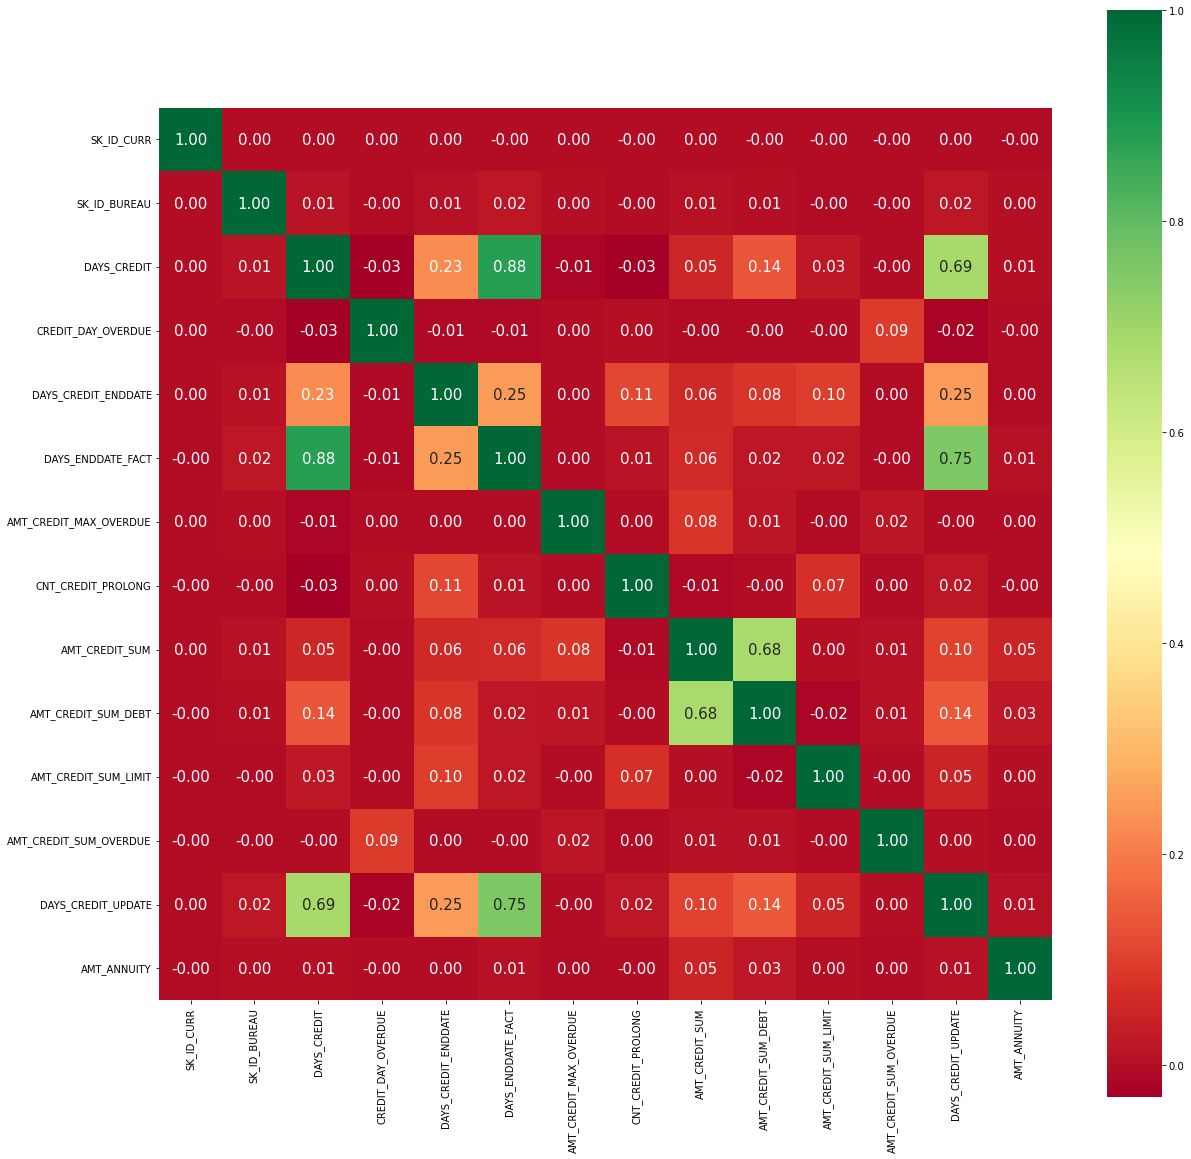

In [77]:
# Finding out the correlation between the features
bureau_corr = bureau.corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(bureau_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='RdYlGn')

In [78]:
upper = bureau_corr.where(np.triu(np.ones(bureau_corr.shape), k=1).astype(bool))
high_corr_columns = [column for column in upper.columns if any(upper[column] > 0.6)]

In [79]:
high_corr_columns

['DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM_DEBT', 'DAYS_CREDIT_UPDATE']

In [80]:
## Drop highly correlated variables
bureau.drop(high_corr_columns, axis=1, inplace=True)

In [81]:
## One-hot encoding
print('Before ohe we have {} features in train'.format(bureau.shape[1]))
bureau_ohe = pd.get_dummies(bureau, columns=ohe_cols, drop_first=True)
print('After ohe we have {} features in train'.format(bureau_ohe.shape[1]))

Before ohe we have 14 features in train
After ohe we have 31 features in train


### Aggregation of trade level data to applicant level

In [83]:
df_bureau_agg = bureau_ohe.drop(columns=['SK_ID_BUREAU']).groupby(['SK_ID_CURR'], as_index=False).agg(['count','mean','median','min','max','sum']).reset_index()
df_bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                                        \
                   count         mean  median   min  max   sum   
0     100001           7  -735.000000  -857.0 -1572  -49 -5145   
1     100002           8  -874.000000 -1042.5 -1437 -103 -6992   
2     100003           4 -1400.750000 -1205.5 -2586 -606 -5603   
3     100004           2  -867.000000  -867.0 -1326 -408 -1734   
4     100005           3  -190.666667  -137.0  -373  -62  -572   

  CREDIT_DAY_OVERDUE                         DAYS_CREDIT_ENDDATE              \
               count mean median min max sum               count        mean   
0                  7  0.0    0.0   0   0   0                   7   82.428571   
1                  8  0.0    0.0   0   0   0                   6 -349.000000   
2                  4  0.0    0.0   0   0   0                   4 -544.500000   
3                  2  0.0    0.0   0   0   0                   2 -488.500000   
4                  3  0.0    0.0   0   0   0                   3  439.333333   

                                 AMT_CREDIT_MAX_OVERDUE                        \
  median     min     max     sum                  count      mean median  min   
0 -179.0 -1329.0  1778.0   577.0                      0       NaN    NaN  NaN   
1 -424.5 -1072.0   780.0 -2094.0                      5  1681.029   40.5  0.0   
2 -480.0 -2434.0  1216.0 -2178.0                      4     0.000    0.0  0.0   
3 -488.5  -595.0  -382.0  -977.0                      1     0.000    0.0  0.0   
4  122.0  -128.0  1324.0  1318.0                      1     0.000    0.0  0.0   

                      CNT_CREDIT_PROLONG                          \
        max       sum              count mean median min max sum   
0       NaN     0.000                  7  0.0    0.0   0   0   0   
1  5043.645  8405.145                  8  0.0    0.0   0   0   0   
2     0.000     0.000                  4  0.0    0.0   0   0   0   
3     0.000     0.000                  2  0.0    0.0   0   0   0   
4     0.000     0.000                  3  0.0    0.0   0   0   0   

  AMT_CREDIT_SUM                                                            \
           count           mean     median      min       max          sum   
0              7  207623.571429  168345.00  85500.0  378000.0  1453365.000   
1              8  108131.945625   54130.50      0.0  450000.0   865055.565   
2              4  254350.125000   92576.25  22248.0  810000.0  1017400.500   
3              2   94518.900000   94518.90  94500.0   94537.8   189037.800   
4              3  219042.000000   58500.00  29826.0  568800.0   657126.000   

  AMT_CREDIT_SUM_LIMIT                                                    \
                 count          mean median  min         max         sum   
0                    6       0.00000    0.0  0.0       0.000       0.000   
1                    4    7997.14125    0.0  0.0   31988.565   31988.565   
2                    4  202500.00000    0.0  0.0  810000.000  810000.000   
3                    2       0.00000    0.0  0.0       0.000       0.000   
4                    3       0.00000    0.0  0.0       0.000       0.000   

  AMT_CREDIT_SUM_OVERDUE                            AMT_ANNUITY               \
                   count mean median  min  max  sum       count         mean   
0                      7  0.0    0.0  0.0  0.0  0.0           7  3545.357143   
1                      8  0.0    0.0  0.0  0.0  0.0           7     0.000000   
2                      4  0.0    0.0  0.0  0.0  0.0           0          NaN   
3                      2  0.0    0.0  0.0  0.0  0.0           0          NaN   
4                      3  0.0    0.0  0.0  0.0  0.0           3  1420.500000   

                                CREDIT_ACTIVE_Bad debt                      \
  median  min      max      sum                  count mean median min max   
0    0.0  0.0  10822.5  24817.5                      7  0.0    0.0   0   0   
1    0.0  0.0      0.0      0.0                      8  0.

In [84]:
## aggregate with mean data
df_bureau_agg.xs(('mean'), level =(1),axis=1).head()

DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
0  -735.000000                 0.0            82.428571   
1  -874.000000                 0.0          -349.000000   
2 -1400.750000                 0.0          -544.500000   
3  -867.000000                 0.0          -488.500000   
4  -190.666667                 0.0           439.333333   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                 0.0   207623.571429   
1                1681.029                 0.0   108131.945625   
2                   0.000                 0.0   254350.125000   
3                   0.000                 0.0    94518.900000   
4                   0.000                 0.0   219042.000000   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  AMT_ANNUITY  \
0               0.00000                     0.0  3545.357143   
1            7997.14125                     0.0     0.000000   
2          202500.00000                     0.0          NaN   
3               0.00000                     0.0          NaN   
4               0.00000                     0.0  1420.500000   

   CREDIT_ACTIVE_Bad debt  CREDIT_ACTIVE_Closed  CREDIT_ACTIVE_Sold  \
0                     0.0              0.571429                 0.0   
1                     0.0              0.750000                 0.0   
2                     0.0              0.750000                 0.0   
3                     0.0              1.000000                 0.0   
4                     0.0              0.333333                 0.0   

   CREDIT_CURRENCY_currency 2  CREDIT_CURRENCY_currency 3  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   CREDIT_CURRENCY_currency 4  CREDIT_TYPE_Car loan  \
0                         0.0                   0.0   
1                         0.0                   0.0   
2                         0.0                   0.0   
3                         0.0                   0.0   
4                         0.0                   0.0   

   CREDIT_TYPE_Cash loan (non-earmarked)  CREDIT_TYPE_Consumer credit  \
0                                    0.0                     1.000000   
1                                    0.0                     0.500000   
2                                    0.0                     0.500000   
3                                    0.0                     1.000000   
4                                    0.0                     0.666667   

   CREDIT_TYPE_Credit card  CREDIT_TYPE_Interbank credit  \
0                 0.000000                           0.0   
1                 0.500000                           0.0   
2                 0.500000                           0.0   
3                 0.000000                           0.0   
4                 0.333333                           0.0   

   CREDIT_TYPE_Loan for business development  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   CREDIT_TYPE_Loan for purchase of shares (margin lending)  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   CREDIT_TYPE_Loan for the purchase of equipment  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4             

In [85]:
df_bureau_agg = bureau_ohe.drop(columns=['SK_ID_BUREAU']).groupby(['SK_ID_CURR']).agg('mean').reset_index()
df_bureau_agg.head()

SK_ID_CURR  DAYS_CREDIT  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
0      100001  -735.000000                 0.0            82.428571   
1      100002  -874.000000                 0.0          -349.000000   
2      100003 -1400.750000                 0.0          -544.500000   
3      100004  -867.000000                 0.0          -488.500000   
4      100005  -190.666667                 0.0           439.333333   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                 0.0   207623.571429   
1                1681.029                 0.0   108131.945625   
2                   0.000                 0.0   254350.125000   
3                   0.000                 0.0    94518.900000   
4                   0.000                 0.0   219042.000000   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  AMT_ANNUITY  \
0               0.00000                     0.0  3545.357143   
1            7997.14125                     0.0     0.000000   
2          202500.00000                     0.0          NaN   
3               0.00000                     0.0          NaN   
4               0.00000                     0.0  1420.500000   

   CREDIT_ACTIVE_Bad debt  CREDIT_ACTIVE_Closed  CREDIT_ACTIVE_Sold  \
0                     0.0              0.571429                 0.0   
1                     0.0              0.750000                 0.0   
2                     0.0              0.750000                 0.0   
3                     0.0              1.000000                 0.0   
4                     0.0              0.333333                 0.0   

   CREDIT_CURRENCY_currency 2  CREDIT_CURRENCY_currency 3  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   CREDIT_CURRENCY_currency 4  CREDIT_TYPE_Car loan  \
0                         0.0                   0.0   
1                         0.0                   0.0   
2                         0.0                   0.0   
3                         0.0                   0.0   
4                         0.0                   0.0   

   CREDIT_TYPE_Cash loan (non-earmarked)  CREDIT_TYPE_Consumer credit  \
0                                    0.0                     1.000000   
1                                    0.0                     0.500000   
2                                    0.0                     0.500000   
3                                    0.0                     1.000000   
4                                    0.0                     0.666667   

   CREDIT_TYPE_Credit card  CREDIT_TYPE_Interbank credit  \
0                 0.000000                           0.0   
1                 0.500000                           0.0   
2                 0.500000                           0.0   
3                 0.000000                           0.0   
4                 0.333333                           0.0   

   CREDIT_TYPE_Loan for business development  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   CREDIT_TYPE_Loan for purchase of shares (margin lending)  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   CREDIT_TYPE_Loan for the purchase of equipment  \
0                                             0.0   
1                                             0.0   
2                                             0.

In [86]:
round(df_bureau_agg.isnull().sum()/len(df_bureau_agg)*100,2)

SK_ID_CURR                                                   0.00
DAYS_CREDIT                                                  0.00
CREDIT_DAY_OVERDUE                                           0.00
DAYS_CREDIT_ENDDATE                                          0.85
AMT_CREDIT_MAX_OVERDUE                                      30.36
CNT_CREDIT_PROLONG                                           0.00
AMT_CREDIT_SUM                                               0.00
AMT_CREDIT_SUM_LIMIT                                         8.28
AMT_CREDIT_SUM_OVERDUE                                       0.00
AMT_ANNUITY                                                 61.34
CREDIT_ACTIVE_Bad debt                                       0.00
CREDIT_ACTIVE_Closed                                         0.00
CREDIT_ACTIVE_Sold                                           0.00
CREDIT_CURRENCY_currency 2                                   0.00
CREDIT_CURRENCY_currency 3                                   0.00
CREDIT_CUR

In [87]:
## Drop variables with high missing values 
df_bureau_agg.drop(['AMT_ANNUITY','AMT_CREDIT_MAX_OVERDUE'], axis=1, inplace=True)

In [88]:
## Capping the outliers with 95 percentile
for col in df_bureau_agg.columns:
    percentiles = df_bureau_agg[col].quantile([0.05, 0.95]).values
    df_bureau_agg[col][df_bureau_agg[col] <= percentiles[0]] = percentiles[0]
    df_bureau_agg[col][df_bureau_agg[col] >= percentiles[1]] = percentiles[1]

In [89]:
df_bureau_agg.DAYS_CREDIT_ENDDATE.fillna(0, inplace=True)

<AxesSubplot:>

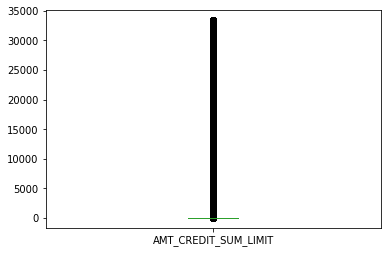

In [90]:
df_bureau_agg.AMT_CREDIT_SUM_LIMIT.plot.box()

In [91]:
df_bureau_agg.AMT_CREDIT_SUM_LIMIT.describe()

count    280503.000000
mean       3005.130238
std        8434.274574
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33387.449000
Name: AMT_CREDIT_SUM_LIMIT, dtype: float64

In [92]:
df_bureau_agg.AMT_CREDIT_SUM_LIMIT.fillna(0, inplace= True)

['CREDIT_TYPE_Credit card']


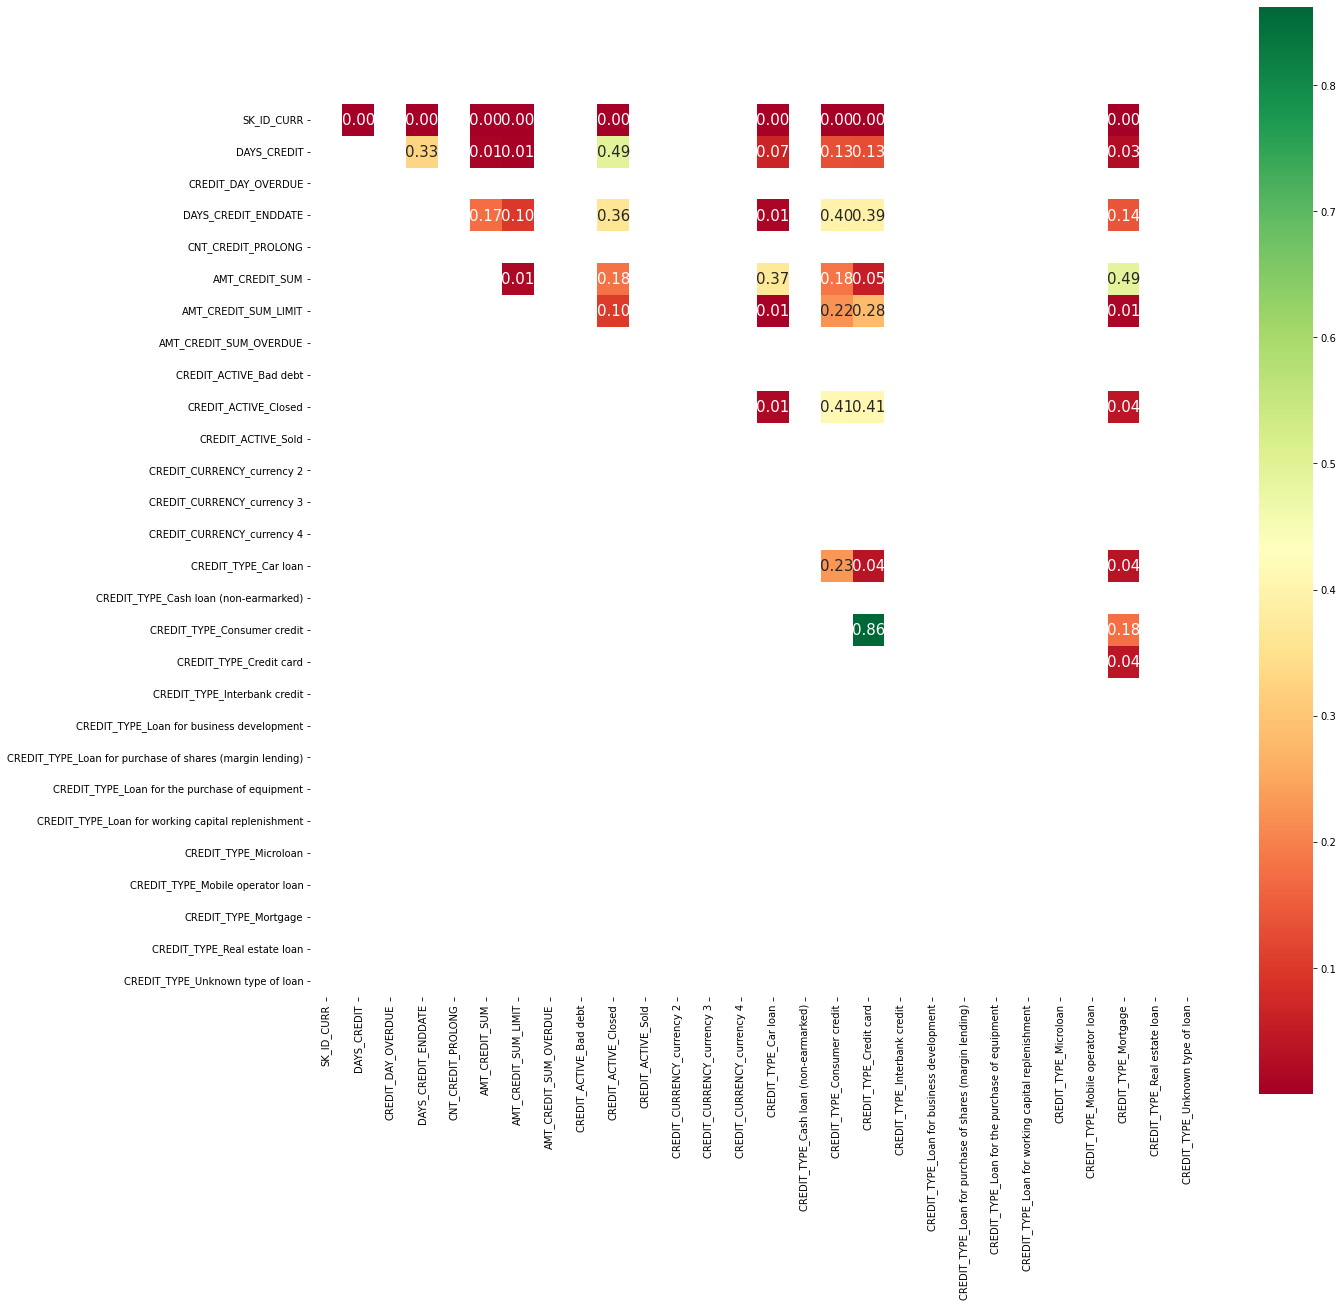

In [94]:
# Create correlation matrix
corr_matrix = df_bureau_agg.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

plt.figure(figsize=(20,20))
sns.heatmap(upper, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='RdYlGn')

# Find features with correlation greater than 0.7
high_corr_columns = [column for column in upper.columns if any(upper[column] > 0.7)]
print(high_corr_columns)

In [95]:
## drop highly correlated variable after onehot encoding
df_bureau_agg.drop('CREDIT_TYPE_Credit card', axis=1, inplace= True)

### Merging Application & Bureau datasets

In [96]:
df_app = application_ohe.merge(df_bureau_agg, how= 'left', on='SK_ID_CURR' )

In [97]:
df_app.isnull().sum()/len(df_app)

SK_ID_CURR                                                  0.000000
TARGET                                                      0.000000
CNT_CHILDREN                                                0.000000
AMT_CREDIT                                                  0.000000
DAYS_REGISTRATION                                           0.000000
DAYS_ID_PUBLISH                                             0.000000
REGION_RATING_CLIENT                                        0.000000
HOUR_APPR_PROCESS_START                                     0.000000
REG_REGION_NOT_LIVE_REGION                                  0.000000
REG_REGION_NOT_WORK_REGION                                  0.000000
REG_CITY_NOT_LIVE_CITY                                      0.000000
REG_CITY_NOT_WORK_CITY                                      0.000000
AMT_REQ_CREDIT_BUREAU_HOUR                                  0.000000
AMT_REQ_CREDIT_BUREAU_DAY                                   0.000000
AMT_REQ_CREDIT_BUREAU_WEEK        

In [98]:
df_app= df_app.fillna(df_app.median())

In [99]:
df_app.shape

(307511, 145)

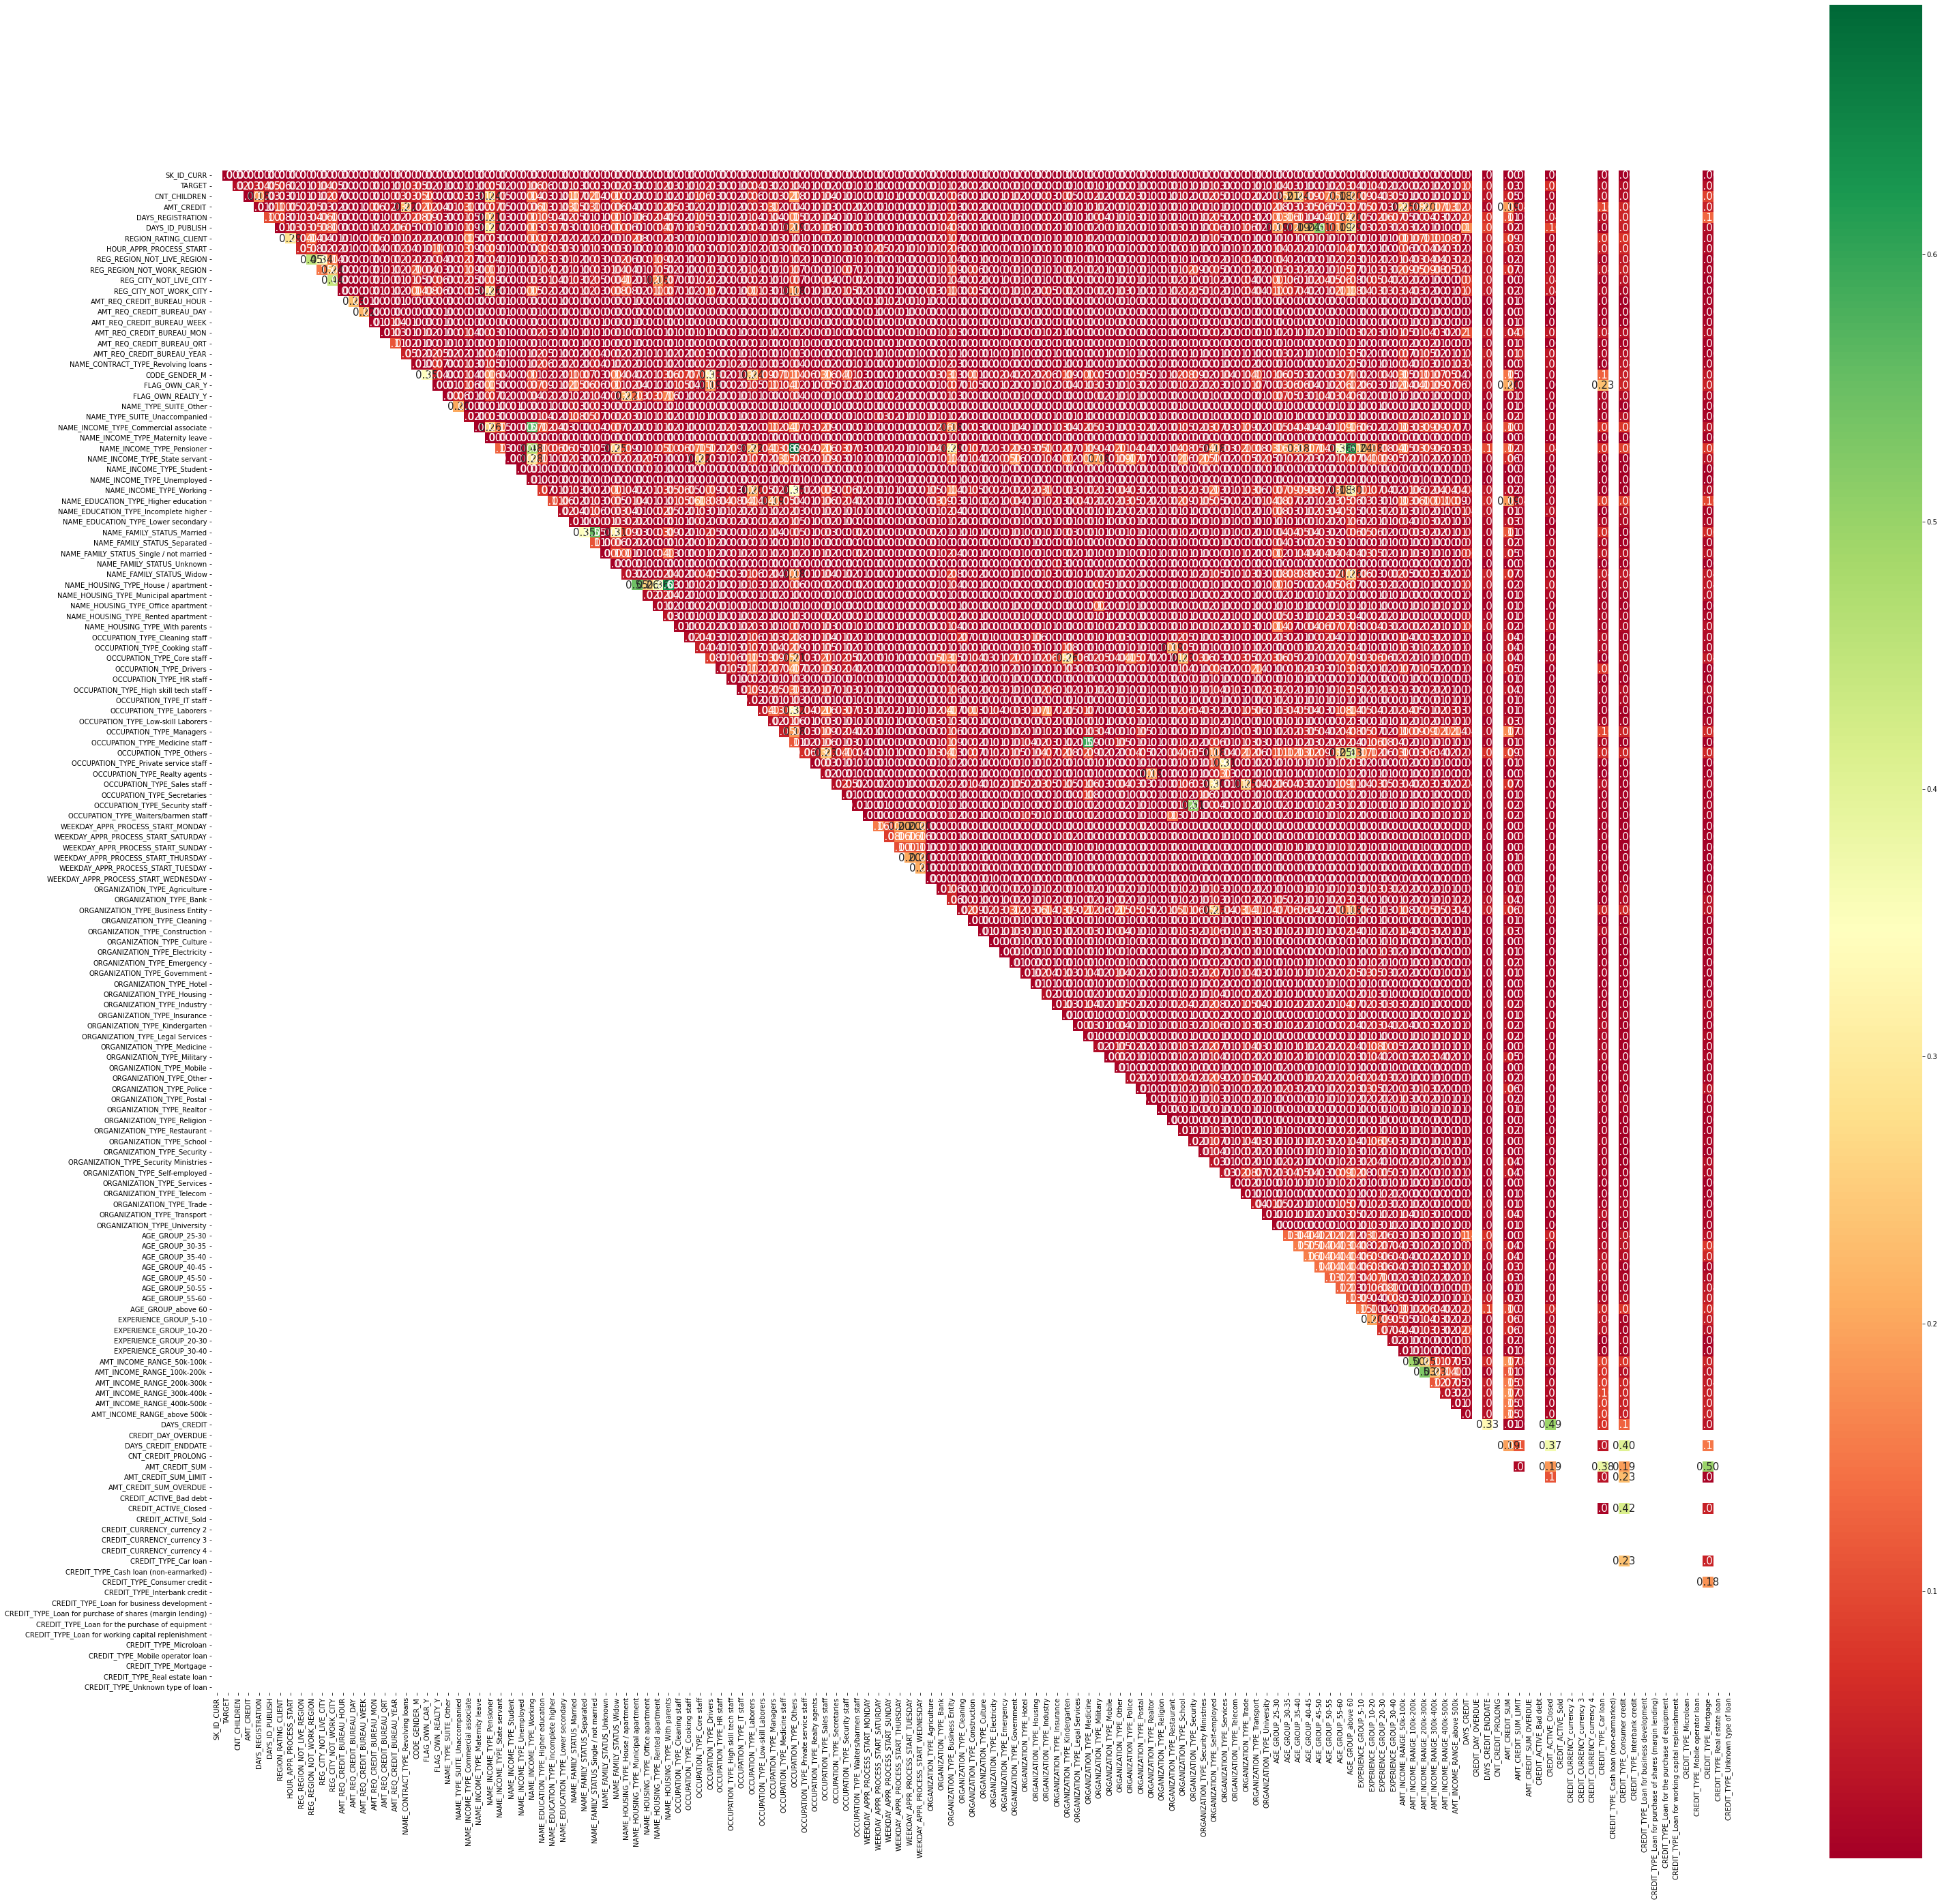

[]


In [100]:
# Create correlation matrix
corr_matrix = df_app.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

plt.figure(figsize=(50,50))
sns.heatmap(upper, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='RdYlGn')
plt.show()

# Find features with correlation greater than 0.7
high_corr_columns = [column for column in upper.columns if any(upper[column] > 0.7)]
print(high_corr_columns)

### Train Test Split

In [101]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X= df_app.drop('TARGET', axis=1)
X=X.drop('SK_ID_CURR', axis=1)
# Putting response variable to y
y= df_app.TARGET

In [102]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
numeric_cols= []
for i in df_app.columns:
    if df_app[i].dtype == 'float64' or 'int64':
           numeric_cols.append(i)

In [105]:
numeric_cols.remove('TARGET')
numeric_cols.remove('SK_ID_CURR')

In [106]:
print(numeric_cols)

['CNT_CHILDREN', 'AMT_CREDIT', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y', 'NAME_TYPE_SUITE_Other', 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Single 

In [107]:
### standardize the numerical columns
scaler= StandardScaler()
X_train[numeric_cols]= scaler.fit_transform(X_train[numeric_cols])
X_train.head()

CNT_CHILDREN  AMT_CREDIT  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
221932     -0.578632    1.318943          -2.942276        -0.885205   
145353     -0.578632    1.635144           0.847502        -0.191440   
69179       0.806524    0.454066          -0.242467        -0.981948   
295472      3.576834   -0.855449           1.298416         1.260365   
190142     -0.578632    1.306212          -1.226021         0.430762   

        REGION_RATING_CLIENT  HOUR_APPR_PROCESS_START  \
221932             -0.101347                 0.896745   
145353             -0.101347                -1.245214   
69179              -0.101347                -0.021238   
295472             -0.101347                 1.202739   
190142             -2.064431                 1.202739   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
221932                   -0.124219                   -0.231162   
145353                   -0.124219                   -0.231162   
69179                    -0.124219                   -0.231162   
295472                   -0.124219                   -0.231162   
190142                   -0.124219                   -0.231162   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
221932               -0.292237               -0.547868   
145353               -0.292237               -0.547868   
69179                -0.292237               -0.547868   
295472               -0.292237               -0.547868   
190142               -0.292237               -0.547868   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
221932                    -0.07212                  -0.058777   
145353                    -0.07212                  -0.058777   
69179                     -0.07212                  -0.058777   
295472                    -0.07212                  -0.058777   
190142                    -0.07212                  -0.058777   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
221932                    -0.15809                  -0.269254   
145353                    -0.15809                  -0.269254   
69179                     -0.15809                  -0.269254   
295472                    -0.15809                   0.889159   
190142                    -0.15809                  -0.269254   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
221932                  -0.286715                    2.880190   
145353                  -0.286715                    0.191067   
69179                   -0.286715                   -0.884582   
295472                  -0.286715                    0.728892   
190142                   3.429263                   -0.346758   

        NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
221932                           -0.325093      -0.720593       -0.718459   
145353                           -0.325093      -0.720593        1.391869   
69179                            -0.325093       1.387746        1.391869   
295472                           -0.325093       1.387746       -0.718459   
190142                           -0.325093      -0.720593       -0.718459   

        FLAG_OWN_REALTY_Y  NAME_TYPE_SUITE_Other  \
221932           0.663971               -0.09694   
145353           0.663971               -0.09694   
69179           -1.506089               -0.09694   
295472           0.663971               -0.09694   
190142          -1.506089               -0.09694   

        NAME_TYPE_SUITE_Unaccompanied  NAME_INCOME_TYPE_Commercial associate  \
221932                      -2.081212                              -0.551923   
145353                       0.480489                              -0.551923   
69179                        0.480489                              -0.551923   
295472                       0.480489                               1.811845   
190142                       0.480489                              -0.551923   

        NAME_INCOME_TYPE_Maternity leave  NAME_INCOME_TY

In [108]:
### Checking the converted rate
TARGET = round((sum(df_app['TARGET'])/len(df_app['TARGET'].index))*100,2)
TARGET

8.07

### Handling class imbalance
As the target variable is highly imabalaced (92:8), using SMOTETOMEK method to balance the target variable

In [109]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=42)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

395860

In [110]:
from collections import Counter
print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 197930), (1, 197930)]


In [111]:
print(X_train.shape)
print(X_resampled_smt_tmk.shape)
print(y_train.shape)
print(y_resampled_smt_tmk.shape)

(215257, 143)
(395860, 143)
(215257,)
(395860,)


### Feature selection

In [112]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)

In [113]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=30)             
rfe = rfe.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

In [114]:
rfe.support_

array([False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False,

In [115]:
list(zip(X_resampled_smt_tmk.columns, rfe.support_, rfe.ranking_))

[('CNT_CHILDREN', False, 6),
 ('AMT_CREDIT', False, 15),
 ('DAYS_REGISTRATION', True, 1),
 ('DAYS_ID_PUBLISH', True, 1),
 ('REGION_RATING_CLIENT', True, 1),
 ('HOUR_APPR_PROCESS_START', False, 37),
 ('REG_REGION_NOT_LIVE_REGION', False, 58),
 ('REG_REGION_NOT_WORK_REGION', False, 18),
 ('REG_CITY_NOT_LIVE_CITY', False, 92),
 ('REG_CITY_NOT_WORK_CITY', False, 73),
 ('AMT_REQ_CREDIT_BUREAU_HOUR', False, 64),
 ('AMT_REQ_CREDIT_BUREAU_DAY', False, 55),
 ('AMT_REQ_CREDIT_BUREAU_WEEK', False, 8),
 ('AMT_REQ_CREDIT_BUREAU_MON', False, 5),
 ('AMT_REQ_CREDIT_BUREAU_QRT', True, 1),
 ('AMT_REQ_CREDIT_BUREAU_YEAR', False, 19),
 ('NAME_CONTRACT_TYPE_Revolving loans', True, 1),
 ('CODE_GENDER_M', True, 1),
 ('FLAG_OWN_CAR_Y', True, 1),
 ('FLAG_OWN_REALTY_Y', True, 1),
 ('NAME_TYPE_SUITE_Other', False, 67),
 ('NAME_TYPE_SUITE_Unaccompanied', True, 1),
 ('NAME_INCOME_TYPE_Commercial associate', True, 1),
 ('NAME_INCOME_TYPE_Maternity leave', False, 71),
 ('NAME_INCOME_TYPE_Pensioner', True, 1),
 ('NAM

In [116]:
col = X_resampled_smt_tmk.columns[rfe.support_]

In [117]:
X_resampled_smt_tmk.columns[~rfe.support_]

Index(['CNT_CHILDREN', 'AMT_CREDIT', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK',
       ...
       'CREDIT_TYPE_Consumer credit', 'CREDIT_TYPE_Interbank credit',
       'CREDIT_TYPE_Loan for business development',
       'CREDIT_TYPE_Loan for purchase of shares (margin lending)',
       'CREDIT_TYPE_Loan for the purchase of equipment',
       'CREDIT_TYPE_Loan for working capital replenishment',
       'CREDIT_TYPE_Microloan', 'CREDIT_TYPE_Mobile operator loan',
       'CREDIT_TYPE_Real estate loan', 'CREDIT_TYPE_Unknown type of loan'],
      dtype='object', length=113)

### Model Building

In [118]:
# Logistic regression model 1
import statsmodels.api as sm
X_resampled_smt_tmk_sm = sm.add_constant(X_resampled_smt_tmk[col])
logm1 = sm.GLM(y_resampled_smt_tmk,X_resampled_smt_tmk_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               395860
Model:                            GLM   Df Residuals:                   395829
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4697e+05
Date:                Mon, 13 Nov 2023   Deviance:                   4.9394e+05
Time:                        07:43:57   Pearson chi2:                 3.97e+05
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2696      0.705     -0.382      0.702      -1.652       1.113
DAYS_REGISTRATION                         0.0787      0.004     19.545      0.000       0.071       0.087
DAYS_ID_PUBLISH                           0.1786      0.005     39.144      0.000       0.170       0.188
REGION_RATING_CLIENT                      0.2104      0.004     54.925      0.000       0.203       0.218
AMT_REQ_CREDIT_BUREAU_QRT                -0.1422      0.005    -26.560      0.000      -0.153      -0.132
NAME_CONTRACT_TYPE_Revolving loans       -0.2699      0.004    -63.715      0.000      -0.278      -0.262
CODE_GENDER_M                             0.2177      0.004     57.358      0.000       0.210       0.225
FLAG_OWN_CAR_Y                           -0.1901      0.004    -46.918      0.000      -0.198      -0.182
FLAG_OWN_REALTY_Y                         0.0724      0.004     19.774      0.000       0.065       0.080
NAME_TYPE_SUITE_Unaccompanied             0.0783      0.004     21.213      0.000       0.071       0.086
NAME_INCOME_TYPE_Commercial associate    -0.5312      0.134     -3.953      0.000      -0.795      -0.268
NAME_INCOME_TYPE_Pensioner               -0.4872      0.122     -3.996      0.000      -0.726      -0.248
NAME_INCOME_TYPE_State servant           -0.3634      0.082     -4.456      0.000      -0.523      -0.204
NAME_INCOME_TYPE_Student                 -0.1749     89.563     -0.002      0.998    -175.716     175.366
NAME_INCOME_TYPE_Working                 -0.5028      0.159     -3.167      0.002      -0.814      -0.192
NAME_EDUCATION_TYPE_Higher education     -0.2909      0.004    -71.079      0.000      -0.299      -0.283
NAME_EDUCATION_TYPE_Incomplete higher    -0.1075      0.004    -29.525      0.000      -0.115      -0.100
NAME_FAMILY_STATUS_Unknown               -0.0473    103.880     -0.000      1.000    -203.649     203.554
AGE_GROUP_45-50                          -0.1650      0.004    -37.724      0.000      -0.174      -0.156
AGE_GROUP_50-55                          -0.1540      0.004    -38.605      0.000      -0.162      -0.146
AGE_GROUP_55-60                          -0.1875      0.005    -37.879      0.000      -0.197      -0.178
AGE_GROUP_above 60                       -0.1950      0.006    -33.226      0.000      -0.207      -0.184
EXPERIENCE_GROUP_5-10                    -0.1624      0.004    -41.494      0.000      -0.170      -0.155
EXPERIENCE_GROUP_10-20                   -0.2135      0.004    -50.534      0.000      -0.222      -0.205
EXPERIENCE_GROUP_20-30                   -0.1396      0.004    -32.043      0.000      -0.148      -0.131
AMT_INCOME_RANGE_100k-200k                0.0729      0.004     20.368      0.000       0.066       0.080
DAYS_CRED

In [119]:
## drop variable with high P-value
col= col.drop(['NAME_FAMILY_STATUS_Unknown'])

In [120]:
## Model 2
X_resampled_smt_tmk_sm = sm.add_constant(X_resampled_smt_tmk[col])
logm2 = sm.GLM(y_resampled_smt_tmk,X_resampled_smt_tmk_sm, family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               395860
Model:                            GLM   Df Residuals:                   395830
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4697e+05
Date:                Mon, 13 Nov 2023   Deviance:                   4.9394e+05
Time:                        07:44:13   Pearson chi2:                 3.97e+05
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2695      0.669     -0.403      0.687      -1.580       1.041
DAYS_REGISTRATION                         0.0787      0.004     19.544      0.000       0.071       0.087
DAYS_ID_PUBLISH                           0.1786      0.005     39.143      0.000       0.170       0.188
REGION_RATING_CLIENT                      0.2104      0.004     54.925      0.000       0.203       0.218
AMT_REQ_CREDIT_BUREAU_QRT                -0.1422      0.005    -26.560      0.000      -0.153      -0.132
NAME_CONTRACT_TYPE_Revolving loans       -0.2700      0.004    -63.720      0.000      -0.278      -0.262
CODE_GENDER_M                             0.2177      0.004     57.358      0.000       0.210       0.225
FLAG_OWN_CAR_Y                           -0.1901      0.004    -46.917      0.000      -0.198      -0.182
FLAG_OWN_REALTY_Y                         0.0724      0.004     19.773      0.000       0.065       0.080
NAME_TYPE_SUITE_Unaccompanied             0.0783      0.004     21.212      0.000       0.071       0.086
NAME_INCOME_TYPE_Commercial associate    -0.5313      0.134     -3.953      0.000      -0.795      -0.268
NAME_INCOME_TYPE_Pensioner               -0.4872      0.122     -3.996      0.000      -0.726      -0.248
NAME_INCOME_TYPE_State servant           -0.3634      0.082     -4.456      0.000      -0.523      -0.204
NAME_INCOME_TYPE_Student                 -0.1749     89.563     -0.002      0.998    -175.715     175.365
NAME_INCOME_TYPE_Working                 -0.5028      0.159     -3.167      0.002      -0.814      -0.192
NAME_EDUCATION_TYPE_Higher education     -0.2909      0.004    -71.081      0.000      -0.299      -0.283
NAME_EDUCATION_TYPE_Incomplete higher    -0.1075      0.004    -29.524      0.000      -0.115      -0.100
AGE_GROUP_45-50                          -0.1650      0.004    -37.723      0.000      -0.174      -0.156
AGE_GROUP_50-55                          -0.1540      0.004    -38.605      0.000      -0.162      -0.146
AGE_GROUP_55-60                          -0.1875      0.005    -37.879      0.000      -0.197      -0.178
AGE_GROUP_above 60                       -0.1950      0.006    -33.226      0.000      -0.207      -0.184
EXPERIENCE_GROUP_5-10                    -0.1624      0.004    -41.494      0.000      -0.170      -0.155
EXPERIENCE_GROUP_10-20                   -0.2135      0.004    -50.534      0.000      -0.222      -0.205
EXPERIENCE_GROUP_20-30                   -0.1396      0.004    -32.043      0.000      -0.148      -0.131
AMT_INCOME_RANGE_100k-200k                0.0729      0.004     20.369      0.000       0.066       0.080
DAYS_CREDIT                               0.1703      0.005     37.520      0.000       0.161       0.179
AMT_CREDI

In [121]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt_tmk[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt_tmk[col].values, i) for i in range(X_resampled_smt_tmk[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
13               NAME_INCOME_TYPE_Working  1843.96
9   NAME_INCOME_TYPE_Commercial associate  1239.27
10             NAME_INCOME_TYPE_Pensioner  1020.99
11         NAME_INCOME_TYPE_State servant   419.27
19                     AGE_GROUP_above 60     2.41
18                        AGE_GROUP_55-60     1.70
1                         DAYS_ID_PUBLISH     1.65
24                            DAYS_CREDIT     1.52
16                        AGE_GROUP_45-50     1.50
26                   CREDIT_ACTIVE_Closed     1.42
12               NAME_INCOME_TYPE_Student     1.24
6                          FLAG_OWN_CAR_Y     1.21
17                        AGE_GROUP_50-55     1.19
5                           CODE_GENDER_M     1.19
0                       DAYS_REGISTRATION     1.18
21                 EXPERIENCE_GROUP_10-20     1.16
20                  EXPERIENCE_GROUP_5-10     1.15
14   NAME_EDUCATION_TYPE_Higher education     1.10
27                   CREDIT_TYPE_Car loan     1.09
22                 EXPERIENCE_GROUP_20-30     1.08
2                    REGION_RATING_CLIENT     1.05
28                   CREDIT_TYPE_Mortgage     1.04
15  NAME_EDUCATION_TYPE_Incomplete higher     1.03
25                   AMT_CREDIT_SUM_LIMIT     1.03
7                       FLAG_OWN_REALTY_Y     1.02
4      NAME_CONTRACT_TYPE_Revolving loans     1.02
23             AMT_INCOME_RANGE_100k-200k     1.02
8           NAME_TYPE_SUITE_Unaccompanied     1.01
3               AMT_REQ_CREDIT_BUREAU_QRT     1.00

In [122]:
## drop variable with high P-value
col= col.drop(['NAME_INCOME_TYPE_Student'])

In [123]:
## Model 3
X_resampled_smt_tmk_sm = sm.add_constant(X_resampled_smt_tmk[col])
logm3 = sm.GLM(y_resampled_smt_tmk,X_resampled_smt_tmk_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               395860
Model:                            GLM   Df Residuals:                   395831
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4698e+05
Date:                Mon, 13 Nov 2023   Deviance:                   4.9396e+05
Time:                        07:45:16   Pearson chi2:                 3.97e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2683      0.004    -73.097      0.000      -0.275      -0.261
DAYS_REGISTRATION                         0.0787      0.004     19.545      0.000       0.071       0.087
DAYS_ID_PUBLISH                           0.1786      0.005     39.142      0.000       0.170       0.188
REGION_RATING_CLIENT                      0.2104      0.004     54.930      0.000       0.203       0.218
AMT_REQ_CREDIT_BUREAU_QRT                -0.1422      0.005    -26.560      0.000      -0.153      -0.132
NAME_CONTRACT_TYPE_Revolving loans       -0.2699      0.004    -63.701      0.000      -0.278      -0.262
CODE_GENDER_M                             0.2176      0.004     57.338      0.000       0.210       0.225
FLAG_OWN_CAR_Y                           -0.1901      0.004    -46.909      0.000      -0.198      -0.182
FLAG_OWN_REALTY_Y                         0.0725      0.004     19.792      0.000       0.065       0.080
NAME_TYPE_SUITE_Unaccompanied             0.0783      0.004     21.220      0.000       0.071       0.086
NAME_INCOME_TYPE_Commercial associate    -0.2789      0.117     -2.374      0.018      -0.509      -0.049
NAME_INCOME_TYPE_Pensioner               -0.2584      0.107     -2.425      0.015      -0.467      -0.050
NAME_INCOME_TYPE_State servant           -0.2104      0.071     -2.951      0.003      -0.350      -0.071
NAME_INCOME_TYPE_Working                 -0.2046      0.139     -1.475      0.140      -0.476       0.067
NAME_EDUCATION_TYPE_Higher education     -0.2909      0.004    -71.088      0.000      -0.299      -0.283
NAME_EDUCATION_TYPE_Incomplete higher    -0.1076      0.004    -29.539      0.000      -0.115      -0.100
AGE_GROUP_45-50                          -0.1651      0.004    -37.729      0.000      -0.174      -0.156
AGE_GROUP_50-55                          -0.1540      0.004    -38.606      0.000      -0.162      -0.146
AGE_GROUP_55-60                          -0.1874      0.005    -37.869      0.000      -0.197      -0.178
AGE_GROUP_above 60                       -0.1949      0.006    -33.204      0.000      -0.206      -0.183
EXPERIENCE_GROUP_5-10                    -0.1624      0.004    -41.488      0.000      -0.170      -0.155
EXPERIENCE_GROUP_10-20                   -0.2136      0.004    -50.552      0.000      -0.222      -0.205
EXPERIENCE_GROUP_20-30                   -0.1396      0.004    -32.052      0.000      -0.148      -0.131
AMT_INCOME_RANGE_100k-200k                0.0728      0.004     20.339      0.000       0.066       0.080
DAYS_CREDIT                               0.1703      0.005     37.512      0.000       0.161       0.179
AMT_CREDIT_SUM_LIMIT                     -0.1041      0.004    -25.423      0.000      -0.112      -0.096
CREDIT_AC

In [124]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt_tmk[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt_tmk[col].values, i) for i in range(X_resampled_smt_tmk[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
12               NAME_INCOME_TYPE_Working  1488.94
9   NAME_INCOME_TYPE_Commercial associate  1000.76
10             NAME_INCOME_TYPE_Pensioner   824.94
11         NAME_INCOME_TYPE_State servant   338.70
18                     AGE_GROUP_above 60     2.41
17                        AGE_GROUP_55-60     1.70
1                         DAYS_ID_PUBLISH     1.65
23                            DAYS_CREDIT     1.52
15                        AGE_GROUP_45-50     1.50
25                   CREDIT_ACTIVE_Closed     1.42
6                          FLAG_OWN_CAR_Y     1.21
5                           CODE_GENDER_M     1.19
16                        AGE_GROUP_50-55     1.19
0                       DAYS_REGISTRATION     1.18
20                 EXPERIENCE_GROUP_10-20     1.16
19                  EXPERIENCE_GROUP_5-10     1.15
13   NAME_EDUCATION_TYPE_Higher education     1.10
26                   CREDIT_TYPE_Car loan     1.09
21                 EXPERIENCE_GROUP_20-30     1.08
2                    REGION_RATING_CLIENT     1.05
27                   CREDIT_TYPE_Mortgage     1.04
24                   AMT_CREDIT_SUM_LIMIT     1.03
14  NAME_EDUCATION_TYPE_Incomplete higher     1.03
22             AMT_INCOME_RANGE_100k-200k     1.02
7                       FLAG_OWN_REALTY_Y     1.02
4      NAME_CONTRACT_TYPE_Revolving loans     1.02
8           NAME_TYPE_SUITE_Unaccompanied     1.01
3               AMT_REQ_CREDIT_BUREAU_QRT     1.00

In [125]:
## drop variable with high P-value
col= col.drop(['NAME_INCOME_TYPE_Working'])

In [126]:
## Model 4
X_resampled_smt_tmk_sm = sm.add_constant(X_resampled_smt_tmk[col])
logm4 = sm.GLM(y_resampled_smt_tmk,X_resampled_smt_tmk_sm, family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               395860
Model:                            GLM   Df Residuals:                   395832
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4698e+05
Date:                Mon, 13 Nov 2023   Deviance:                   4.9397e+05
Time:                        07:46:13   Pearson chi2:                 3.97e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2683      0.004    -73.096      0.000      -0.275      -0.261
DAYS_REGISTRATION                         0.0788      0.004     19.548      0.000       0.071       0.087
DAYS_ID_PUBLISH                           0.1786      0.005     39.138      0.000       0.170       0.188
REGION_RATING_CLIENT                      0.2104      0.004     54.929      0.000       0.203       0.218
AMT_REQ_CREDIT_BUREAU_QRT                -0.1422      0.005    -26.567      0.000      -0.153      -0.132
NAME_CONTRACT_TYPE_Revolving loans       -0.2698      0.004    -63.690      0.000      -0.278      -0.261
CODE_GENDER_M                             0.2176      0.004     57.334      0.000       0.210       0.225
FLAG_OWN_CAR_Y                           -0.1901      0.004    -46.904      0.000      -0.198      -0.182
FLAG_OWN_REALTY_Y                         0.0725      0.004     19.798      0.000       0.065       0.080
NAME_TYPE_SUITE_Unaccompanied             0.0783      0.004     21.218      0.000       0.071       0.086
NAME_INCOME_TYPE_Commercial associate    -0.1057      0.004    -27.261      0.000      -0.113      -0.098
NAME_INCOME_TYPE_Pensioner               -0.1015      0.006    -16.496      0.000      -0.114      -0.089
NAME_INCOME_TYPE_State servant           -0.1054      0.004    -26.168      0.000      -0.113      -0.098
NAME_EDUCATION_TYPE_Higher education     -0.2909      0.004    -71.082      0.000      -0.299      -0.283
NAME_EDUCATION_TYPE_Incomplete higher    -0.1076      0.004    -29.538      0.000      -0.115      -0.100
AGE_GROUP_45-50                          -0.1651      0.004    -37.731      0.000      -0.174      -0.156
AGE_GROUP_50-55                          -0.1540      0.004    -38.604      0.000      -0.162      -0.146
AGE_GROUP_55-60                          -0.1874      0.005    -37.866      0.000      -0.197      -0.178
AGE_GROUP_above 60                       -0.1948      0.006    -33.192      0.000      -0.206      -0.183
EXPERIENCE_GROUP_5-10                    -0.1623      0.004    -41.483      0.000      -0.170      -0.155
EXPERIENCE_GROUP_10-20                   -0.2136      0.004    -50.551      0.000      -0.222      -0.205
EXPERIENCE_GROUP_20-30                   -0.1396      0.004    -32.053      0.000      -0.148      -0.131
AMT_INCOME_RANGE_100k-200k                0.0728      0.004     20.326      0.000       0.066       0.080
DAYS_CREDIT                               0.1703      0.005     37.512      0.000       0.161       0.179
AMT_CREDIT_SUM_LIMIT                     -0.1041      0.004    -25.427      0.000      -0.112      -0.096
CREDIT_ACTIVE_Closed                     -0.1203      0.004    -27.617      0.000      -0.129      -0.112
CREDIT_TY

In [127]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt_tmk[col].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt_tmk[col].values, i) for i in range(X_resampled_smt_tmk[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10             NAME_INCOME_TYPE_Pensioner  2.88
17                     AGE_GROUP_above 60  2.41
16                        AGE_GROUP_55-60  1.70
1                         DAYS_ID_PUBLISH  1.65
22                            DAYS_CREDIT  1.52
14                        AGE_GROUP_45-50  1.50
24                   CREDIT_ACTIVE_Closed  1.42
6                          FLAG_OWN_CAR_Y  1.21
5                           CODE_GENDER_M  1.19
15                        AGE_GROUP_50-55  1.19
0                       DAYS_REGISTRATION  1.18
19                 EXPERIENCE_GROUP_10-20  1.16
18                  EXPERIENCE_GROUP_5-10  1.15
9   NAME_INCOME_TYPE_Commercial associate  1.14
12   NAME_EDUCATION_TYPE_Higher education  1.10
25                   CREDIT_TYPE_Car loan  1.09
11         NAME_INCOME_TYPE_State servant  1.08
20                 EXPERIENCE_GROUP_20-30  1.08
2                    REGION_RATING_CLIENT  1.05
26                   CREDIT_TYPE_Mortgage  1.04
23                   AMT_CREDIT_SUM_LIMIT  1.03
13  NAME_EDUCATION_TYPE_Incomplete higher  1.03
21             AMT_INCOME_RANGE_100k-200k  1.02
7                       FLAG_OWN_REALTY_Y  1.02
4      NAME_CONTRACT_TYPE_Revolving loans  1.02
8           NAME_TYPE_SUITE_Unaccompanied  1.01
3               AMT_REQ_CREDIT_BUREAU_QRT  1.00

In [128]:
## drop variable with high VIF to reduce number of features
col= col.drop(['NAME_INCOME_TYPE_Pensioner'])

In [129]:
## Model 5
X_resampled_smt_tmk_sm = sm.add_constant(X_resampled_smt_tmk[col])
logm5 = sm.GLM(y_resampled_smt_tmk,X_resampled_smt_tmk_sm, family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               395860
Model:                            GLM   Df Residuals:                   395833
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4712e+05
Date:                Mon, 13 Nov 2023   Deviance:                   4.9424e+05
Time:                        07:47:04   Pearson chi2:                 3.97e+05
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2680      0.004    -73.000      0.000      -0.275      -0.261
DAYS_REGISTRATION                         0.0791      0.004     19.631      0.000       0.071       0.087
DAYS_ID_PUBLISH                           0.1837      0.005     40.352      0.000       0.175       0.193
REGION_RATING_CLIENT                      0.2100      0.004     54.842      0.000       0.203       0.218
AMT_REQ_CREDIT_BUREAU_QRT                -0.1422      0.005    -26.554      0.000      -0.153      -0.132
NAME_CONTRACT_TYPE_Revolving loans       -0.2684      0.004    -63.409      0.000      -0.277      -0.260
CODE_GENDER_M                             0.2238      0.004     59.277      0.000       0.216       0.231
FLAG_OWN_CAR_Y                           -0.1888      0.004    -46.613      0.000      -0.197      -0.181
FLAG_OWN_REALTY_Y                         0.0720      0.004     19.684      0.000       0.065       0.079
NAME_TYPE_SUITE_Unaccompanied             0.0796      0.004     21.583      0.000       0.072       0.087
NAME_INCOME_TYPE_Commercial associate    -0.0960      0.004    -25.027      0.000      -0.104      -0.088
NAME_INCOME_TYPE_State servant           -0.1006      0.004    -25.012      0.000      -0.108      -0.093
NAME_EDUCATION_TYPE_Higher education     -0.2903      0.004    -70.950      0.000      -0.298      -0.282
NAME_EDUCATION_TYPE_Incomplete higher    -0.1075      0.004    -29.536      0.000      -0.115      -0.100
AGE_GROUP_45-50                          -0.1713      0.004    -39.340      0.000      -0.180      -0.163
AGE_GROUP_50-55                          -0.1659      0.004    -42.281      0.000      -0.174      -0.158
AGE_GROUP_55-60                          -0.2338      0.004    -57.021      0.000      -0.242      -0.226
AGE_GROUP_above 60                       -0.2611      0.004    -60.703      0.000      -0.270      -0.253
EXPERIENCE_GROUP_5-10                    -0.1502      0.004    -39.035      0.000      -0.158      -0.143
EXPERIENCE_GROUP_10-20                   -0.2011      0.004    -48.327      0.000      -0.209      -0.193
EXPERIENCE_GROUP_20-30                   -0.1309      0.004    -30.226      0.000      -0.139      -0.122
AMT_INCOME_RANGE_100k-200k                0.0745      0.004     20.826      0.000       0.068       0.082
DAYS_CREDIT                               0.1695      0.005     37.368      0.000       0.161       0.178
AMT_CREDIT_SUM_LIMIT                     -0.1034      0.004    -25.254      0.000      -0.111      -0.095
CREDIT_ACTIVE_Closed                     -0.1206      0.004    -27.712      0.000      -0.129      -0.112
CREDIT_TYPE_Car loan                     -0.0738      0.004    -17.304      0.000      -0.082      -0.065
CREDIT_TY

In [130]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt_tmk[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_resampled_smt_tmk[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                         DAYS_ID_PUBLISH  1.67
13                        AGE_GROUP_45-50  1.56
21                            DAYS_CREDIT  1.42
23                   CREDIT_ACTIVE_Closed  1.36
16                     AGE_GROUP_above 60  1.36
15                        AGE_GROUP_55-60  1.21
6                          FLAG_OWN_CAR_Y  1.21
14                        AGE_GROUP_50-55  1.19
0                       DAYS_REGISTRATION  1.16
5                           CODE_GENDER_M  1.16
17                  EXPERIENCE_GROUP_5-10  1.13
18                 EXPERIENCE_GROUP_10-20  1.13
9   NAME_INCOME_TYPE_Commercial associate  1.12
11   NAME_EDUCATION_TYPE_Higher education  1.09
10         NAME_INCOME_TYPE_State servant  1.08
24                   CREDIT_TYPE_Car loan  1.08
19                 EXPERIENCE_GROUP_20-30  1.06
2                    REGION_RATING_CLIENT  1.05
12  NAME_EDUCATION_TYPE_Incomplete higher  1.04
25                   CREDIT_TYPE_Mortgage  1.04
7                       FLAG_OWN_REALTY_Y  1.03
4      NAME_CONTRACT_TYPE_Revolving loans  1.02
20             AMT_INCOME_RANGE_100k-200k  1.02
22                   AMT_CREDIT_SUM_LIMIT  1.02
8           NAME_TYPE_SUITE_Unaccompanied  1.01
3               AMT_REQ_CREDIT_BUREAU_QRT  1.00

#### Making prediction on Train set

In [132]:
# Getting the predicted values on the train set
y_pred_smt_tmk = logm5.fit().predict(X_resampled_smt_tmk_sm)
y_pred_smt_tmk[:10]

0    0.486527
1    0.223760
2    0.393111
3    0.579859
4    0.213600
5    0.158918
6    0.312791
7    0.362953
8    0.412210
9    0.298027
dtype: float64

In [133]:
# Reshaping into an array
y_pred_smt_tmk = y_pred_smt_tmk.values.reshape(-1)
y_pred_smt_tmk[:10]

array([0.4865275 , 0.22375956, 0.39311085, 0.57985895, 0.21360028,
       0.15891817, 0.31279108, 0.36295318, 0.4122099 , 0.29802727])

In [134]:
y_pred_smt_tmk_final = pd.DataFrame({'TARGET':y_resampled_smt_tmk.values, 'TARGET_prob':y_pred_smt_tmk})
y_pred_smt_tmk_final['SK_ID'] = y_resampled_smt_tmk.index
y_pred_smt_tmk_final.head()

TARGET  TARGET_prob  SK_ID
0       0     0.486527      0
1       0     0.223760      1
2       0     0.393111      2
3       0     0.579859      3
4       0     0.213600      4

Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

Creating new column 'Default' with 1 if Default_Prob > 0.5 else 0

In [135]:
y_pred_smt_tmk_final['Predicted'] = y_pred_smt_tmk_final.TARGET_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_pred_smt_tmk_final.head()

TARGET  TARGET_prob  SK_ID  Predicted
0       0     0.486527      0          0
1       0     0.223760      1          0
2       0     0.393111      2          0
3       0     0.579859      3          1
4       0     0.213600      4          0

#### Confusion Matrix

In [136]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.Predicted )
print(confusion)

[[126539  71391]
 [ 66110 131820]]


In [137]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.Predicted))

Accuracy : 0.6526524528873844


In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Sensitivity :  0.6659930278381246
Specificity :  0.6393118779366442
False Positive Rate : 0.3606881220633557
Positive Predictive Value : 0.6486853565997903
Negative predictive value : 0.6568370456114488


###### We found out that specificity & sensitivity was 64% & 66% respectively. 
This was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. lets check if we can able to find more optimized cutoff


In [140]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [141]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.TARGET_prob, drop_intermediate = False )

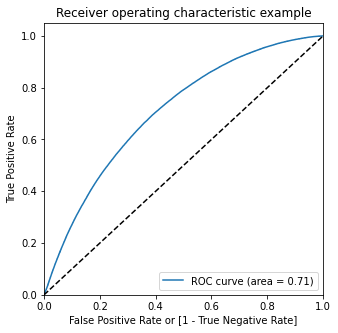

In [142]:
draw_roc(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.TARGET_prob)

### Finding Optimal Cut Off point

In [143]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_smt_tmk_final[i]= y_pred_smt_tmk_final.TARGET_prob.map(lambda x: 1 if x > i else 0)
y_pred_smt_tmk_final.head()

TARGET  TARGET_prob  SK_ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0       0     0.486527      0          0    1    1    1    1    1    0    0   
1       0     0.223760      1          0    1    1    1    0    0    0    0   
2       0     0.393111      2          0    1    1    1    1    0    0    0   
3       0     0.579859      3          1    1    1    1    1    1    1    0   
4       0     0.213600      4          0    1    1    1    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [144]:
##Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.508455  0.998853  0.018057
0.2   0.2  0.542896  0.986293  0.099500
0.3   0.3  0.593381  0.941186  0.245577
0.4   0.4  0.637988  0.835508  0.440469
0.5   0.5  0.652652  0.665993  0.639312
0.6   0.6  0.627823  0.450720  0.804926
0.7   0.7  0.572116  0.223412  0.920820
0.8   0.8  0.515940  0.048739  0.983141
0.9   0.9  0.500157  0.000616  0.999697


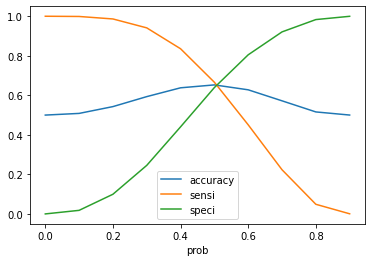

In [145]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

as the target variable was balanced using SMOTE + TOMEK technique, the optimal cutoff will be 0.5

In [147]:
y_pred_smt_tmk_final['final_predicted'] = y_pred_smt_tmk_final.TARGET_prob.map( lambda x: 1 if x > 0.48 else 0)
y_pred_smt_tmk_final.head()

TARGET  TARGET_prob  SK_ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0       0     0.486527      0          0    1    1    1    1    1    0    0   
1       0     0.223760      1          0    1    1    1    0    0    0    0   
2       0     0.393111      2          0    1    1    1    1    0    0    0   
3       0     0.579859      3          1    1    1    1    1    1    1    0   
4       0     0.213600      4          0    1    1    1    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                1  
4    0    0    0                0

In [148]:
y_pred_smt_tmk_final['default_Score'] = y_pred_smt_tmk_final.TARGET_prob.map( lambda x: round(x*100))
y_pred_smt_tmk_final.head()

TARGET  TARGET_prob  SK_ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0       0     0.486527      0          0    1    1    1    1    1    0    0   
1       0     0.223760      1          0    1    1    1    0    0    0    0   
2       0     0.393111      2          0    1    1    1    1    0    0    0   
3       0     0.579859      3          1    1    1    1    1    1    1    0   
4       0     0.213600      4          0    1    1    1    0    0    0    0   

   0.7  0.8  0.9  final_predicted  default_Score  
0    0    0    0                1             49  
1    0    0    0                0             22  
2    0    0    0                0             39  
3    0    0    0                1             58  
4    0    0    0                0             21

In [149]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.final_predicted))

Accuracy : 0.6528949628656596


In [150]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.Predicted )
confusion

array([[126539,  71391],
       [ 66110, 131820]], dtype=int64)

In [151]:
# Precision
TP / TP + FP
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

# Recall
TP / TP + FN
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision :  0.6486853565997903
Recall : 0.6659930278381246


In [152]:
### Using sklearn utilities for the same

from sklearn.metrics import precision_score, recall_score

In [153]:
print("Precision :",precision_score(y_pred_smt_tmk_final.TARGET , y_pred_smt_tmk_final.Predicted))
print("Recall :",recall_score(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.Predicted))

Precision : 0.6486853565997903
Recall : 0.6659930278381246


In [154]:
from sklearn.metrics import precision_recall_curve

y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.Predicted

(0         0
 1         0
 2         0
 3         0
 4         0
          ..
 395855    1
 395856    1
 395857    1
 395858    1
 395859    1
 Name: TARGET, Length: 395860, dtype: int64, 0         0
 1         0
 2         0
 3         1
 4         0
          ..
 395855    1
 395856    1
 395857    0
 395858    1
 395859    0
 Name: Predicted, Length: 395860, dtype: int64)

In [155]:
p, r, thresholds = precision_recall_curve(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.TARGET_prob)

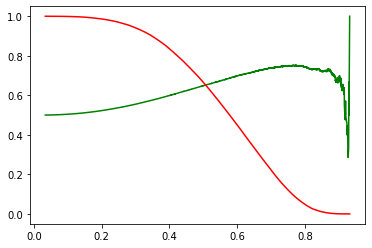

In [156]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Make prediction on X Test

In [157]:
numeric_cols= []
for i in df_app.columns:
    if df_app[i].dtype == 'float64' or 'int64':
           numeric_cols.append(i)

In [158]:
numeric_cols.remove('SK_ID_CURR')
numeric_cols.remove('TARGET')

In [159]:
X_test[numeric_cols]= scaler.transform(X_test[numeric_cols])
X_test.head()

CNT_CHILDREN  AMT_CREDIT  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
226323     -0.578632    1.711943           1.264648         1.894494   
216456     -0.578632   -0.337365           1.400858        -0.602265   
36242      -0.578632    1.306212           0.484841        -1.649208   
227057     -0.578632    2.254571           0.592107         0.741532   
100973      0.806524   -0.534173          -1.431472        -0.911047   

        REGION_RATING_CLIENT  HOUR_APPR_PROCESS_START  \
226323              1.861736                -0.939220   
216456              1.861736                 0.284757   
36242              -0.101347                 0.590751   
227057             -2.064431                 0.590751   
100973             -2.064431                 0.284757   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
226323                   -0.124219                   -0.231162   
216456                   -0.124219                   -0.231162   
36242                    -0.124219                   -0.231162   
227057                   -0.124219                   -0.231162   
100973                   -0.124219                   -0.231162   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
226323               -0.292237               -0.547868   
216456               -0.292237               -0.547868   
36242                -0.292237               -0.547868   
227057               -0.292237               -0.547868   
100973               -0.292237               -0.547868   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
226323                    -0.07212                  -0.058777   
216456                    -0.07212                  -0.058777   
36242                     -0.07212                  -0.058777   
227057                    -0.07212                  -0.058777   
100973                    -0.07212                  -0.058777   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
226323                   -0.158090                   0.889159   
216456                   -0.158090                  -0.269254   
36242                    -0.158090                  -0.269254   
227057                    5.138418                  -0.269254   
100973                   -0.158090                  -0.269254   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
226323                  -0.286715                   -0.884582   
216456                  -0.286715                   -0.884582   
36242                   -0.286715                   -0.884582   
227057                  -0.286715                    0.728892   
100973                  -0.286715                   -0.884582   

        NAME_CONTRACT_TYPE_Revolving loans  CODE_GENDER_M  FLAG_OWN_CAR_Y  \
226323                           -0.325093      -0.720593       -0.718459   
216456                           -0.325093      -0.720593       -0.718459   
36242                            -0.325093      -0.720593       -0.718459   
227057                           -0.325093       1.387746        1.391869   
100973                           -0.325093      -0.720593       -0.718459   

        FLAG_OWN_REALTY_Y  NAME_TYPE_SUITE_Other  \
226323           0.663971               -0.09694   
216456           0.663971               -0.09694   
36242           -1.506089               -0.09694   
227057           0.663971               -0.09694   
100973           0.663971               -0.09694   

        NAME_TYPE_SUITE_Unaccompanied  NAME_INCOME_TYPE_Commercial associate  \
226323                       0.480489                              -0.551923   
216456                       0.480489                              -0.551923   
36242                        0.480489                              -0.551923   
227057                       0.480489                              -0.551923   
100973                       0.480489                               1.811845   

        NAME_INCOME_TYPE_Maternity leave  NAME_INCOME_TY

In [161]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col]
X_test.head()

DAYS_REGISTRATION  DAYS_ID_PUBLISH  REGION_RATING_CLIENT  \
226323           1.264648         1.894494              1.861736   
216456           1.400858        -0.602265              1.861736   
36242            0.484841        -1.649208             -0.101347   
227057           0.592107         0.741532             -2.064431   
100973          -1.431472        -0.911047             -2.064431   

        AMT_REQ_CREDIT_BUREAU_QRT  NAME_CONTRACT_TYPE_Revolving loans  \
226323                  -0.286715                           -0.325093   
216456                  -0.286715                           -0.325093   
36242                   -0.286715                           -0.325093   
227057                  -0.286715                           -0.325093   
100973                  -0.286715                           -0.325093   

        CODE_GENDER_M  FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_Y  \
226323      -0.720593       -0.718459           0.663971   
216456      -0.720593       -0.718459           0.663971   
36242       -0.720593       -0.718459          -1.506089   
227057       1.387746        1.391869           0.663971   
100973      -0.720593       -0.718459           0.663971   

        NAME_TYPE_SUITE_Unaccompanied  NAME_INCOME_TYPE_Commercial associate  \
226323                       0.480489                              -0.551923   
216456                       0.480489                              -0.551923   
36242                        0.480489                              -0.551923   
227057                       0.480489                              -0.551923   
100973                       0.480489                               1.811845   

        NAME_INCOME_TYPE_State servant  NAME_EDUCATION_TYPE_Higher education  \
226323                       -0.276032                              1.762673   
216456                       -0.276032                             -0.567320   
36242                        -0.276032                             -0.567320   
227057                       -0.276032                              1.762673   
100973                       -0.276032                             -0.567320   

        NAME_EDUCATION_TYPE_Incomplete higher  AGE_GROUP_45-50  \
226323                              -0.185277         2.778580   
216456                              -0.185277        -0.359896   
36242                               -0.185277        -0.359896   
227057                              -0.185277        -0.359896   
100973                              -0.185277        -0.359896   

        AGE_GROUP_50-55  AGE_GROUP_55-60  AGE_GROUP_above 60  \
226323        -0.357809        -0.347962           -0.358990   
216456        -0.357809        -0.347962            2.785596   
36242         -0.357809        -0.347962           -0.358990   
227057        -0.357809        -0.347962            2.785596   
100973        -0.357809        -0.347962           -0.358990   

        EXPERIENCE_GROUP_5-10  EXPERIENCE_GROUP_10-20  EXPERIENCE_GROUP_20-30  \
226323              -0.516461               -0.377562               -0.179015   
216456              -0.516461               -0.377562               -0.179015   
36242               -0.516461                2.648571               -0.179015   
227057              -0.516461               -0.377562               -0.179015   
100973              -0.516461                2.648571               -0.179015   

        AMT_INCOME_RANGE_100k-200k  DAYS_CREDIT  AMT_CREDIT_SUM_LIMIT  \
226323                    0.985559    -0.892752             -0.295236   
216456                   -1.014653     0.033472             -0.295236   
36242                    -1.014653    -0.386670             -0.295236   
227057                    0.985559     0.928701             -0.295236   
100973                    0.985559    -0.871194              4.306381   

        CREDIT_ACTIVE_Closed  CREDIT_TYPE_Car loan  CREDIT_TYPE_Mortgage  
226323              0.580008             -0.240595    

In [162]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = logm5.fit().predict(X_test_sm)
y_test_pred[:10]

226323    0.555108
216456    0.557257
36242     0.373430
227057    0.341101
100973    0.186498
206396    0.389394
75447     0.449731
217793    0.794739
247724    0.351264
105377    0.661160
dtype: float64

In [163]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [164]:
# Let's see the head
y_pred_1.head()

0
226323  0.555108
216456  0.557257
36242   0.373430
227057  0.341101
100973  0.186498

In [165]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [166]:
# Putting Prospect ID to index
y_test_df['SK_ID_CURR'] = y_test_df.index

In [167]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [169]:
# Appending y_test_df and y_pred_1
y_pred_smt_tmk_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [170]:
y_pred_smt_tmk_final.head()

TARGET  SK_ID_CURR         0
0       0      226323  0.555108
1       0      216456  0.557257
2       0       36242  0.373430
3       0      227057  0.341101
4       0      100973  0.186498

In [171]:
# Renaming the column 
y_pred_smt_tmk_final= y_pred_smt_tmk_final.rename(columns={ 0 : 'Target_prob'})

In [172]:
y_pred_smt_tmk_final = y_pred_smt_tmk_final.reindex(columns=['SK_ID_CURR','TARGET','Target_prob'])

In [173]:
# Let's see the head of y_pred_final
y_pred_smt_tmk_final.head()

SK_ID_CURR  TARGET  Target_prob
0      226323       0     0.555108
1      216456       0     0.557257
2       36242       0     0.373430
3      227057       0     0.341101
4      100973       0     0.186498

In [174]:
y_pred_smt_tmk_final['final_predicted'] = y_pred_smt_tmk_final.Target_prob.map(lambda x: 1 if x > 0.5 else 0)

In [175]:
y_pred_smt_tmk_final.head()

SK_ID_CURR  TARGET  Target_prob  final_predicted
0      226323       0     0.555108                1
1      216456       0     0.557257                1
2       36242       0     0.373430                0
3      227057       0     0.341101                0
4      100973       0     0.186498                0

In [176]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.final_predicted))

Accuracy : 0.6352353285494395


In [177]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_smt_tmk_final.TARGET, y_pred_smt_tmk_final.final_predicted )
confusion2

array([[54062, 30681],
       [ 2970,  4541]], dtype=int64)

In [178]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [179]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.6045799494075356
Specificity : 0.6379523972481503


### Model evaluation

In [321]:
from sklearn.model_selection import cross_val_score

In [325]:
cross_val_score(logreg,X_resampled_smt_tmk, y_resampled_smt_tmk, cv=5)

array([0.64352296, 0.66111757, 0.66028394, 0.65753044, 0.6615849 ])

In [352]:
y_pred_smt_tmk_final['Default_score'] = y_pred_smt_tmk_final.Target_prob.map( lambda x: round(x*100))
y_pred_smt_tmk_final.head()

SK_ID_CURR  TARGET  Target_prob  final_predicted  Default_score
0      226323       0     0.555108                1             56
1      216456       0     0.557257                1             56
2       36242       0     0.373430                0             37
3      227057       0     0.341101                0             34
4      100973       0     0.186498                0             19

In [360]:
defaults =y_pred_smt_tmk_final.loc[y_pred_smt_tmk_final["Default_score"]>=90]
defaults

SK_ID_CURR  TARGET  Target_prob  final_predicted  Default_score
1436        71213       0     0.912839                1             91
2740       263759       1     0.898669                1             90
7238       277816       1     0.920161                1             92
9738       125943       1     0.898122                1             90
12918       60671       1     0.896442                1             90
13705      109897       0     0.923594                1             92
17557      150340       1     0.904739                1             90
19499      260613       0     0.911038                1             91
20349       32605       0     0.899526                1             90
22117      252251       1     0.917797                1             92
23020      115557       0     0.909898                1             91
23635      280047       1     0.900890                1             90
23784      153957       0     0.896951                1             90
24246      245814       0     0.914449                1             91
26977      229629       1     0.934735                1             93
31235       20439       1     0.922249                1             92
31766      284790       0     0.895747                1             90
36058      215281       0     0.897336                1             90
39665      121937       0     0.903626                1             90
41015       63515       0     0.913382                1             91
41948      110979       0     0.896817                1             90
47579      161063       0     0.902468                1             90
48067       18289       0     0.911455                1             91
48186       56442       1     0.917263                1             92
48782      287648       0     0.918720                1             92
51740       53788       1     0.900668                1             90
51971      126878       1     0.898406                1             90
52880      131768       0     0.903416                1             90
53214      268978       1     0.899907                1             90
54796      262866       0     0.911077                1             91
56105       96323       0     0.914173                1             91
62090       71209       0     0.899040                1             90
64041      278031       0     0.897076                1             90
66159      222332       0     0.901334                1             90
66652       64472       0     0.907607                1             91
67572      216622       0     0.897648                1             90
71894      225578       1     0.905361                1             91
79380      216277       1     0.918871                1             92
80347      290982       0     0.895893                1             90
83570       41400       0     0.900512                1             90
85252      273980       1     0.901924                1             90
86681      194669       0     0.928569                1             93
86876      148223       1     0.911338                1             91
86944       73671       0     0.910570                1             91
89345      194770       1     0.913993                1             91
91185      146796       0     0.896069                1             90

In [361]:
logm5.fit().params.sort_values(ascending=False)

CODE_GENDER_M                            0.223848
REGION_RATING_CLIENT                     0.210045
DAYS_ID_PUBLISH                          0.183657
DAYS_CREDIT                              0.169548
NAME_TYPE_SUITE_Unaccompanied            0.079609
DAYS_REGISTRATION                        0.079093
AMT_INCOME_RANGE_100k-200k               0.074513
FLAG_OWN_REALTY_Y                        0.072023
CREDIT_TYPE_Car loan                    -0.073834
NAME_INCOME_TYPE_Commercial associate   -0.096010
NAME_INCOME_TYPE_State servant          -0.100592
AMT_CREDIT_SUM_LIMIT                    -0.103391
NAME_EDUCATION_TYPE_Incomplete higher   -0.107492
CREDIT_ACTIVE_Closed                    -0.120621
EXPERIENCE_GROUP_20-30                  -0.130896
AMT_REQ_CREDIT_BUREAU_QRT               -0.142162
EXPERIENCE_GROUP_5-10                   -0.150153
AGE_GROUP_50-55                         -0.165874
AGE_GROUP_45-50                         -0.171348
CREDIT_TYPE_Mortgage                    -0.177756
